### Loading Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import gc

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [2]:
train_df = pd.read_csv('E:\\IIT Kanpur\\IME 1st Sem Courses\\IME672 - DM&KD\\Dataset\\tmdb-box-office-prediction\\train.csv')
test_df = pd.read_csv('E:\\IIT Kanpur\\IME 1st Sem Courses\\IME672 - DM&KD\\Dataset\\tmdb-box-office-prediction\\test.csv')
sub_df = pd.read_csv('E:\\IIT Kanpur\\IME 1st Sem Courses\\IME672 - DM&KD\\Dataset\\tmdb-box-office-prediction\\sample_submission.csv')

In [3]:
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

### Check for NA values in trainset

In [5]:
train_df.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [6]:
test_df.isna().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

## Exploratory Data Analysis

In [7]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

So many columns and features to investigate, lets start by inspecting one by one each feature.

### Univariate Analysis

#### Revenue
Our target variable that must be predicted

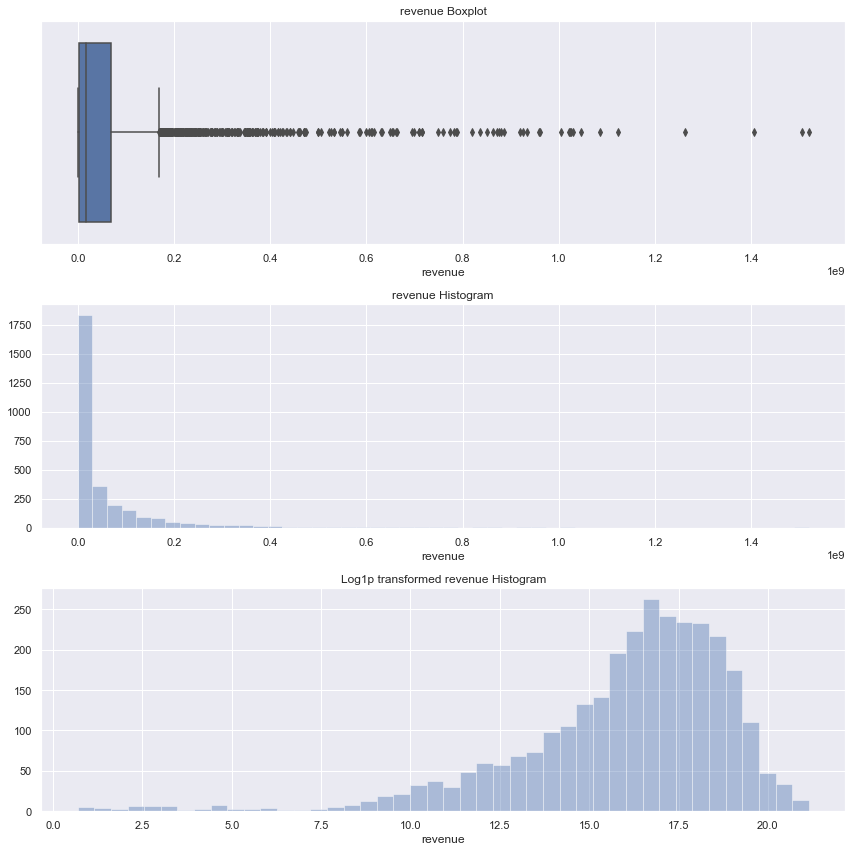

In [9]:
f, ax = plt.subplots(3, figsize=(12,12))

sns.set(rc = {'figure.figsize':(12,8)})

sns.boxplot(x = train_df.revenue, ax = ax[0])
ax[0].set_title("revenue Boxplot")

sns.distplot(a = train_df.revenue, kde = False, ax = ax[1])
ax[1].set_title("revenue Histogram")

sns.distplot(a = np.log1p(train_df.revenue), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed revenue Histogram")

f.tight_layout()

In [10]:
train_df["log_revenue"] = np.log1p(train_df.revenue)

#### Title

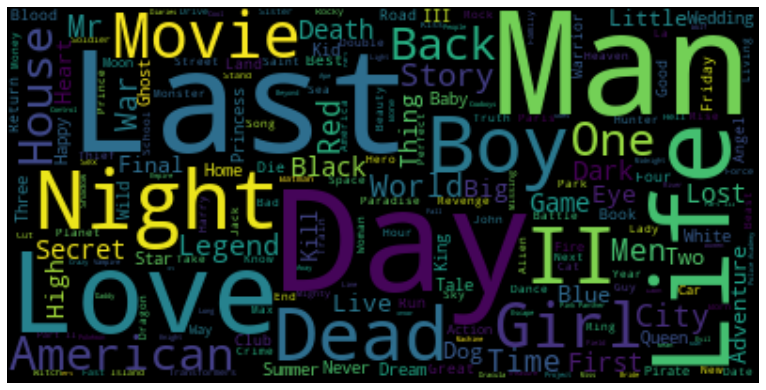

In [11]:
wordcloud = WordCloud().generate(train_df.title.to_string())

sns.set(rc = {'figure.figsize':(12,8)})

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
train_df["title"] = train_df["title"].fillna("")
test_df["title"] = test_df["title"].fillna("")

train_df["title_len"] = train_df["title"].apply(len)
test_df["title_len"] = test_df["title"].apply(len)

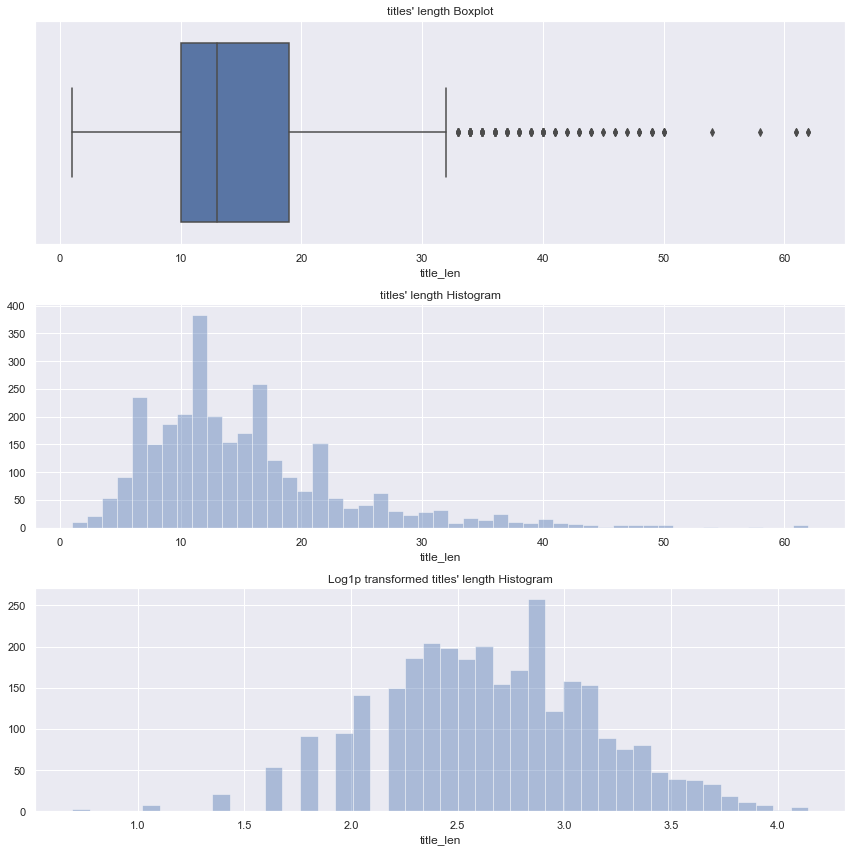

In [14]:
f, ax = plt.subplots(3, figsize=(12,12))

sns.set(rc={'figure.figsize':(12,8)})

sns.boxplot(x = train_df.title_len, ax = ax[0])
ax[0].set_title("titles' length Boxplot")

sns.distplot(a = train_df.title_len, kde = False, ax = ax[1])
ax[1].set_title("titles' length Histogram")

sns.distplot(a = np.log1p(train_df.title_len), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed titles' length Histogram")

f.tight_layout()

In [15]:
train_df["log_title_len"] = np.log1p(train_df.title_len)
test_df["log_title_len"] = np.log1p(test_df.title_len)

#### Overview

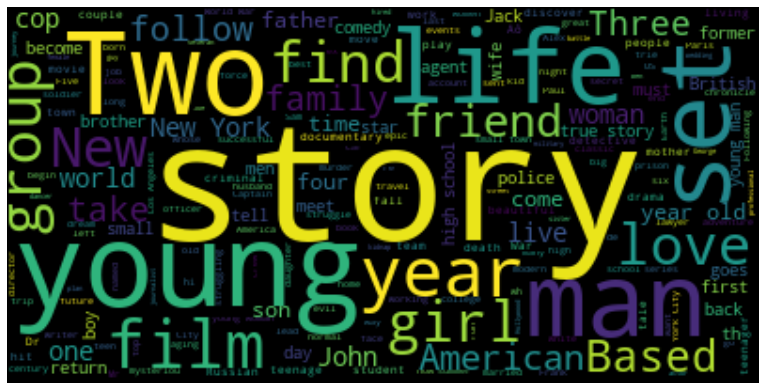

In [16]:
wordcloud = WordCloud().generate(train_df.overview.to_string())

sns.set(rc={'figure.figsize':(12,8)})

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
train_df["overview"] = train_df["overview"].fillna("")
test_df["overview"] = test_df["overview"].fillna("")

train_df["overview_len"] = train_df["overview"].apply(len)
test_df["overview_len"] = test_df["overview"].apply(len)

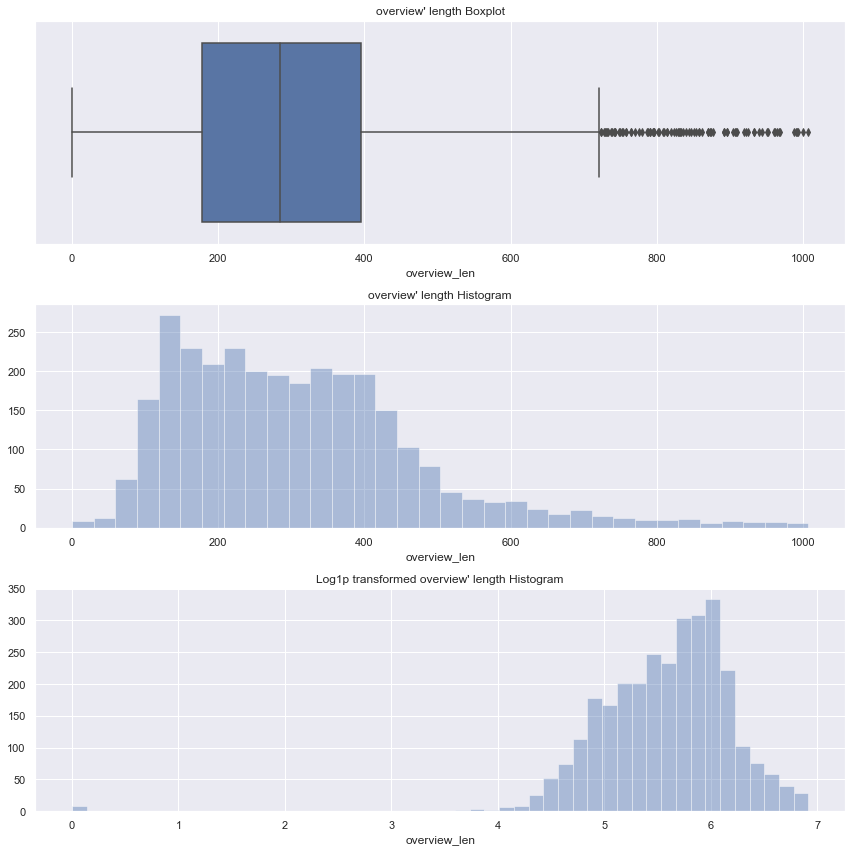

In [18]:
f, ax = plt.subplots(3, figsize=(12,12))

sns.set(rc={'figure.figsize':(12,8)})

sns.boxplot(x = train_df.overview_len, ax = ax[0])
ax[0].set_title("overview' length Boxplot")

sns.distplot(a = train_df.overview_len, kde = False, ax = ax[1])
ax[1].set_title("overview' length Histogram")

sns.distplot(a = np.log1p(train_df.overview_len), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed overview' length Histogram")

f.tight_layout()

In [19]:
train_df["log_overview_len"] = np.log1p(train_df.overview_len)
test_df["log_overview_len"] = np.log1p(test_df.overview_len)

#### Tagline

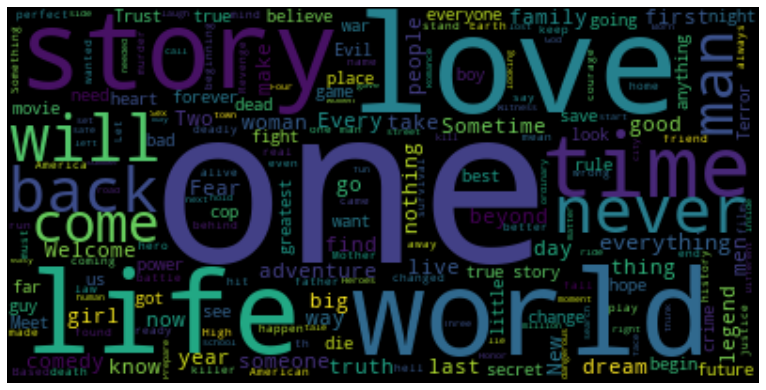

In [22]:
wordcloud = WordCloud().generate(train_df.tagline.to_string())

sns.set(rc={'figure.figsize':(12,8)})

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
train_df["tagline"] = train_df["tagline"].fillna("")
test_df["tagline"] = test_df["tagline"].fillna("")

train_df["tagline_len"] = train_df["tagline"].apply(len)
test_df["tagline_len"] = test_df["tagline"].apply(len)

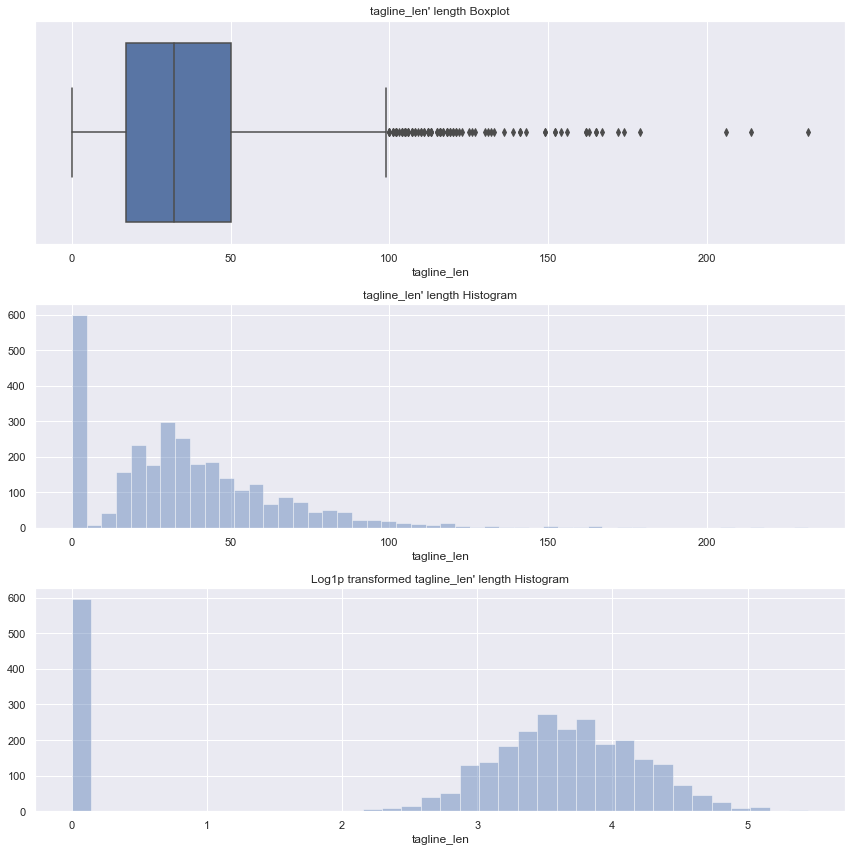

In [23]:
f, ax = plt.subplots(3, figsize=(12,12))

sns.set(rc={'figure.figsize':(12,8)})

sns.boxplot(x = train_df.tagline_len, ax = ax[0])
ax[0].set_title("tagline_len' length Boxplot")

sns.distplot(a = train_df.tagline_len, kde = False, ax = ax[1])
ax[1].set_title("tagline_len' length Histogram")

sns.distplot(a = np.log1p(train_df.tagline_len), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed tagline_len' length Histogram")

f.tight_layout()

In [24]:
train_df["log_tagline_len"] = np.log1p(train_df.tagline_len)
test_df["log_tagline_len"] = np.log1p(test_df.tagline_len)

#### Budget

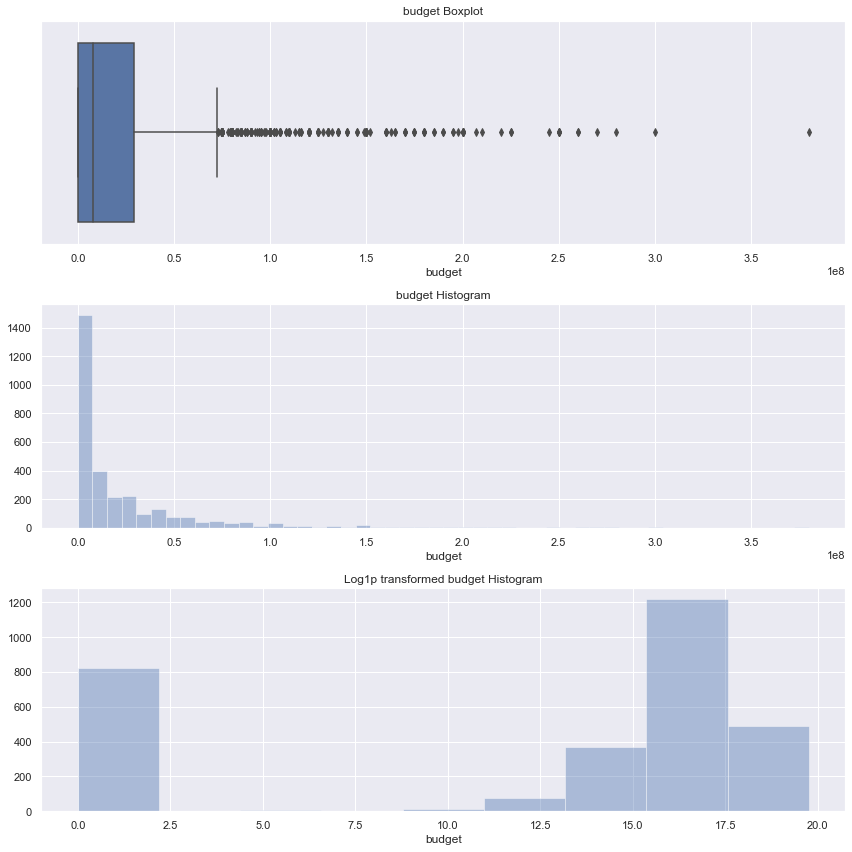

In [25]:
f, ax = plt.subplots(3, figsize=(12,12))

sns.set(rc={'figure.figsize':(12,8)})

sns.boxplot(x = train_df.budget, ax = ax[0])
ax[0].set_title("budget Boxplot")

sns.distplot(a = train_df.budget, kde = False, ax = ax[1])
ax[1].set_title("budget Histogram")

sns.distplot(a = np.log1p(train_df.budget), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed budget Histogram")

f.tight_layout()

In [26]:
train_df["log_budget"] = np.log1p(train_df.budget)
test_df["log_budget"] = np.log1p(test_df.budget)

#### Genres

In [27]:
def genres_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace('\'','').replace(' ','').replace("name", "").replace("id", "").replace(":", "")
    ll = str1.split(",")[1::2]
    return ll

In [28]:
train_df["genres_processed"] = train_df.genres.apply(lambda elem: genres_preprocessing(elem))
test_df["genres_processed"] = test_df.genres.apply(lambda elem: genres_preprocessing(elem))

In [29]:
genres_dict = dict()

In [30]:
for genre in train_df["genres_processed"]:
    for elem in genre:
        if elem not in genres_dict:
            genres_dict[elem] = 1
        else:
            genres_dict[elem] += 1

In [31]:
genres_dict

{'Comedy': 1028,
 'Drama': 1531,
 'Family': 260,
 'Romance': 571,
 'Thriller': 789,
 'Action': 741,
 'Animation': 141,
 'Adventure': 439,
 'Horror': 301,
 'Documentary': 87,
 'Music': 100,
 'Crime': 469,
 'ScienceFiction': 290,
 'Mystery': 225,
 'Foreign': 31,
 'Fantasy': 232,
 'War': 100,
 'Western': 43,
 'History': 132,
 'TVMovie': 1}

In [32]:
sns.set(rc = {'figure.figsize':(12,8)})

genres_df = pd.DataFrame.from_dict(genres_dict, orient='index')

genres_df.columns = ["number_of_movies"]
genres_df = genres_df.sort_values(by = "number_of_movies", ascending=False)

Text(0.5, 1.0, 'Number of films per genre')

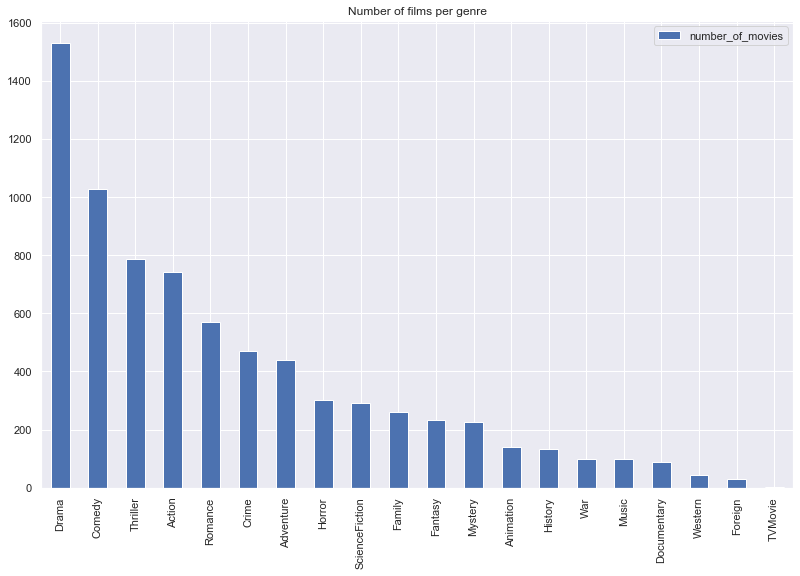

In [33]:
genres_df.plot.bar()
plt.title("Number of films per genre")

#### Number of Genres

In [34]:
sns.set(rc = {'figure.figsize':(9,8)})
train_df['num_genres'] = train_df['genres_processed'].apply(lambda x: len(x) if x != {} else 0)
test_df['num_genres'] = test_df['genres_processed'].apply(lambda x: len(x) if x != {} else 0)

Text(0.5, 1.0, 'Number of films with more than 1 genre')

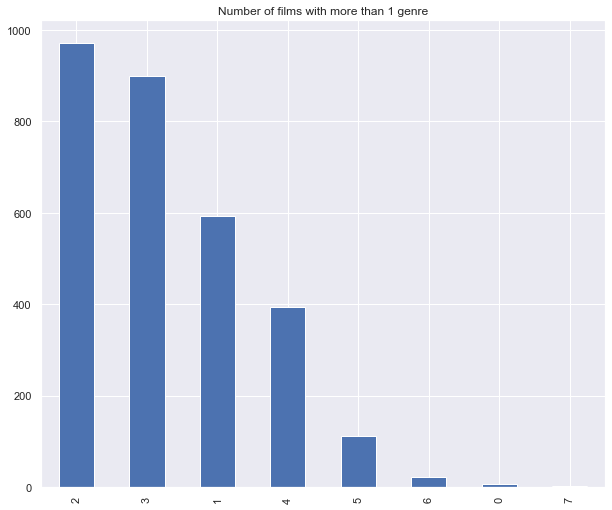

In [35]:
train_df['num_genres'].value_counts().plot.bar()
plt.title("Number of films with more than 1 genre")

#### isGenre, feature engineering, creating new feature
isDrama, isComedy etc.

In [36]:
# genres_df.index.values
# for g in genres_df.index.values:
#     train_df['isGenre_' + g] = train_df['genres_processed'].apply(lambda x: 1 if g in x else 0)
#     test_df['isGenre_' + g] = test_df['genres_processed'].apply(lambda x: 1 if g in x else 0)

In [37]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'log_revenue', 'title_len', 'log_title_len', 'overview_len',
       'log_overview_len', 'tagline_len', 'log_tagline_len', 'log_budget',
       'genres_processed', 'num_genres'],
      dtype='object')

#### Original Language

Text(0.5, 1.0, 'Number of films per language')

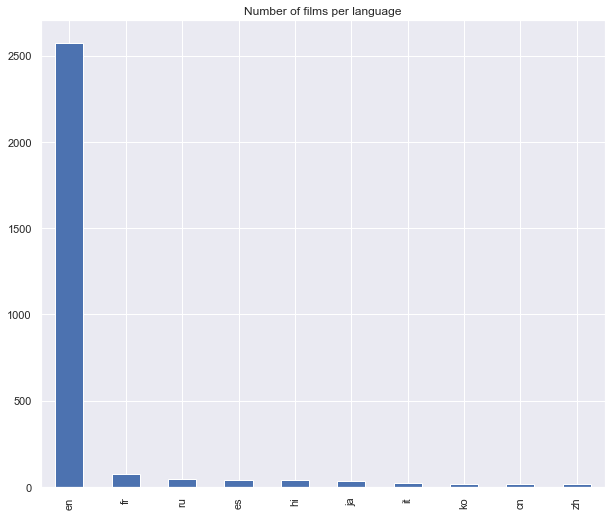

In [38]:
train_df.original_language.value_counts()[:10].plot.bar()
plt.title("Number of films per language")

#### English and Non-English movies

In [39]:
train_df["is_english_language"] = train_df.original_language.apply(lambda x: 1 if x == "en" else 0)
test_df["is_english_language"] = test_df.original_language.apply(lambda x: 1 if x == "en" else 0)

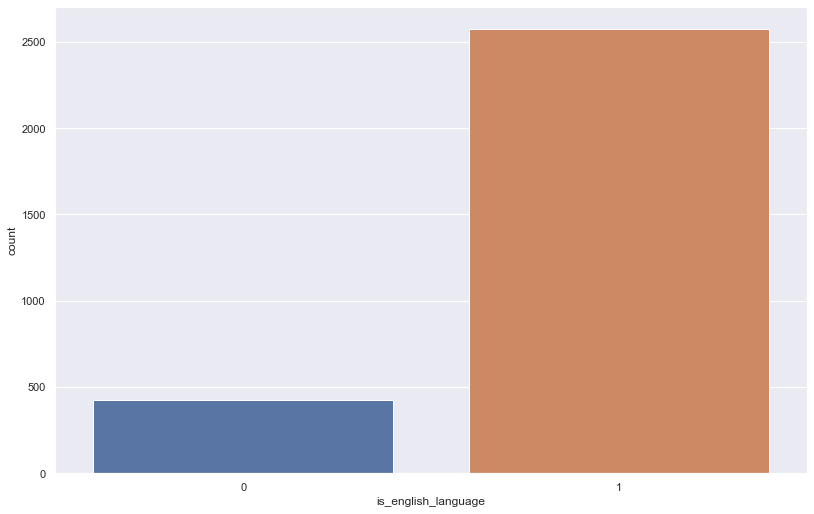

In [40]:
train_df.is_english_language = train_df.is_english_language.fillna(1)
test_df.is_english_language = test_df.is_english_language.fillna(1)

sns.set(rc = {'figure.figsize':(12,8)})
ax = sns.countplot(x = "is_english_language", data=train_df)

#### Production Companies

In [41]:
def production_companies_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace(' ','').replace("name", "").replace("id", "").replace(":", "").replace("\'", "")
    ll = str1.split(",")[0::2]
    return ll

In [42]:
train_df["production_companies"] = train_df.production_companies.fillna('NoProductionCompany')
train_df["production_companies"] = test_df.production_companies.fillna('NoProductionCompany')

In [43]:
train_df["production_companies_processed"] = train_df.production_companies.apply(lambda elem: production_companies_preprocessing(elem))
test_df["production_companies_processed"] = test_df.production_companies.apply(lambda elem: production_companies_preprocessing(elem))

In [44]:
production_companies_dict = dict()

for production_company in train_df["production_companies_processed"]:
    for elem in production_company:
        if elem not in production_companies_dict:
            production_companies_dict[elem] = 1
        else:
            production_companies_dict[elem] += 1

In [45]:
sns.set(rc={'figure.figsize':(12,8)})

production_companies_df = pd.DataFrame.from_dict(production_companies_dict, orient='index')

Text(0.5, 1.0, 'Number of films per production company')

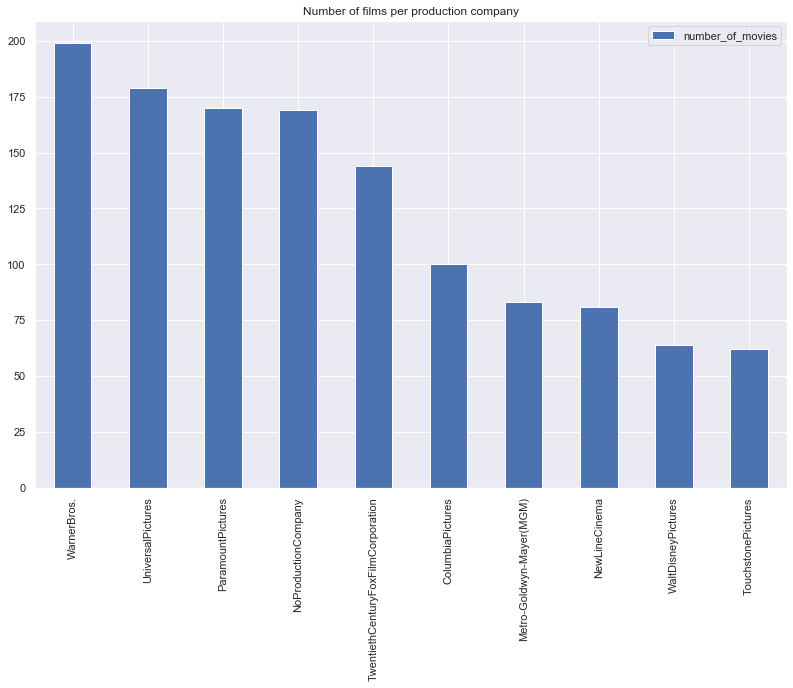

In [46]:
production_companies_df.columns = ["number_of_movies"]
production_companies_df = production_companies_df.sort_values(by="number_of_movies", ascending=False)
production_companies_df.head(10).plot.bar()
plt.title("Number of films per production company")

#### Number of Production Companies

Text(0.5, 1.0, 'Number of multiple production companies per movie')

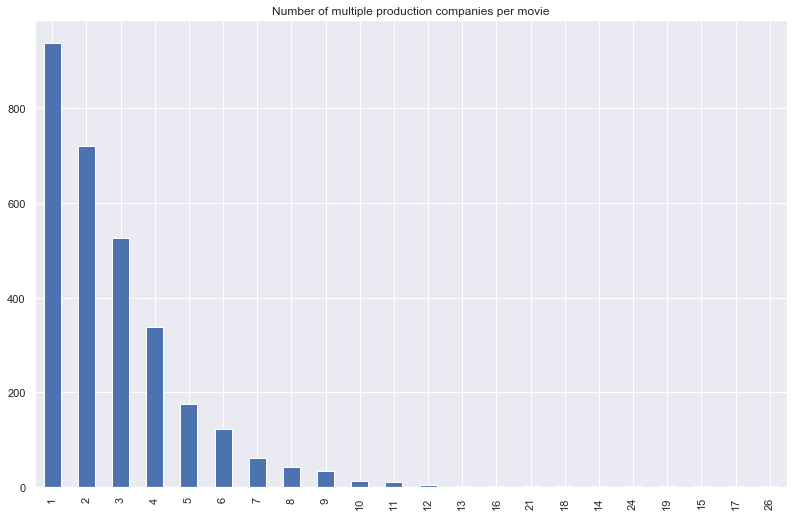

In [47]:
train_df["num_of_production_companies"] = train_df.production_companies_processed.apply(len)
test_df["num_of_production_companies"] = test_df.production_companies_processed.apply(len)

train_df["num_of_production_companies"].value_counts().plot.bar()
plt.title("Number of multiple production companies per movie")

#### isProductionCompany feature engineering
Feature Engineering with all the production companies

In [48]:
# for g in production_companies_df.index.values:
#     train_df['isProductionCompany_' + g] = train_df['production_companies_processed'].apply(lambda x: 1 if g in x else 0)
#     test_df['isProductionCompany_' + g] = test_df['production_companies_processed'].apply(lambda x: 1 if g in x else 0)

In [50]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'log_revenue', 'title_len', 'log_title_len', 'overview_len',
       'log_overview_len', 'tagline_len', 'log_tagline_len', 'log_budget',
       'genres_processed', 'num_genres', 'is_english_language',
       'production_companies_processed', 'num_of_production_companies'],
      dtype='object')

#### production_countries

In [51]:
def production_countries_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace(' ','').replace("name", "").replace("iso_3166_1", "").replace(":", "").replace("\'", "")
    ll = str1.split(",")[0::2]
    return ll

In [52]:
train_df["production_countries_processed"] = train_df.production_countries.fillna("NaN").apply(lambda elem: production_countries_preprocessing(elem))
test_df["production_countries_processed"] = test_df.production_countries.fillna("NaN").apply(lambda elem: production_countries_preprocessing(elem))

In [53]:
production_countries_dict = dict()

for production_country in train_df["production_countries_processed"]:
    for elem in production_country:
        if elem not in production_countries_dict:
            production_countries_dict[elem] = 1
        else:
            production_countries_dict[elem] += 1

Text(0.5, 1.0, 'Number of films per production country')

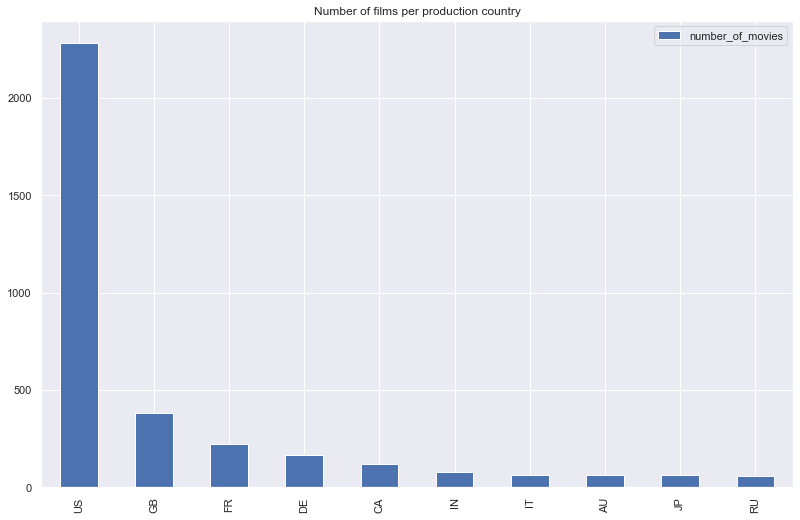

In [54]:
production_countries_df = pd.DataFrame.from_dict(production_countries_dict, orient='index')
production_countries_df.columns = ["number_of_movies"]
production_countries_df = production_countries_df.sort_values(by="number_of_movies", ascending=False)
production_countries_df.head(10).plot.bar()
plt.title("Number of films per production country")

#### isProduction_country feature engineering

In [55]:
# for c in production_countries_df.index.values:
#     train_df['isProductionCountry_' + c] = train_df['production_countries_processed'].apply(lambda x: 1 if c in x else 0)
#     test_df['isProductionCountry_' + c] = test_df['production_countries_processed'].apply(lambda x: 1 if c in x else 0)

#### popularity

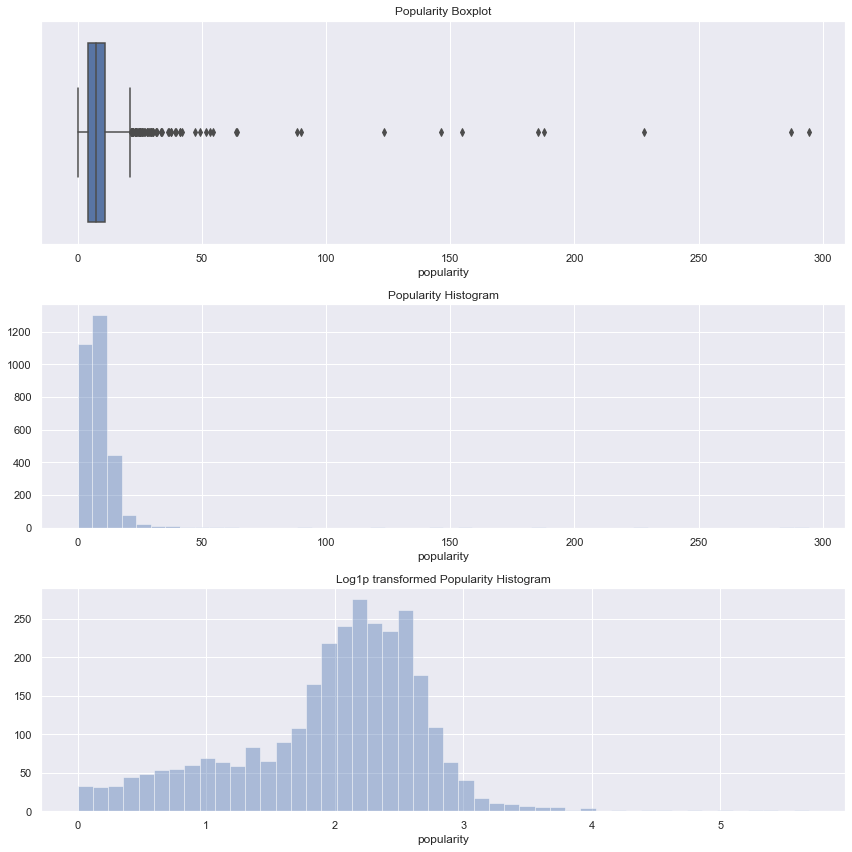

In [56]:
f, ax = plt.subplots(3, figsize=(12,12))

sns.boxplot(x = train_df.popularity, ax = ax[0])
ax[0].set_title("Popularity Boxplot")

sns.distplot(a = train_df.popularity, kde = False, ax = ax[1])
ax[1].set_title("Popularity Histogram")

sns.distplot(a = np.log1p(train_df.popularity), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed Popularity Histogram")

f.tight_layout()

In [57]:
train_df["log_popularity"] = np.log1p(train_df.popularity)
test_df["log_popularity"] = np.log1p(test_df.popularity)

#### Runtime

In [58]:
train_df["runtime"] = train_df["runtime"].fillna(train_df["runtime"].mode()[0])
test_df["runtime"] = test_df["runtime"].fillna(test_df["runtime"].mode()[0])

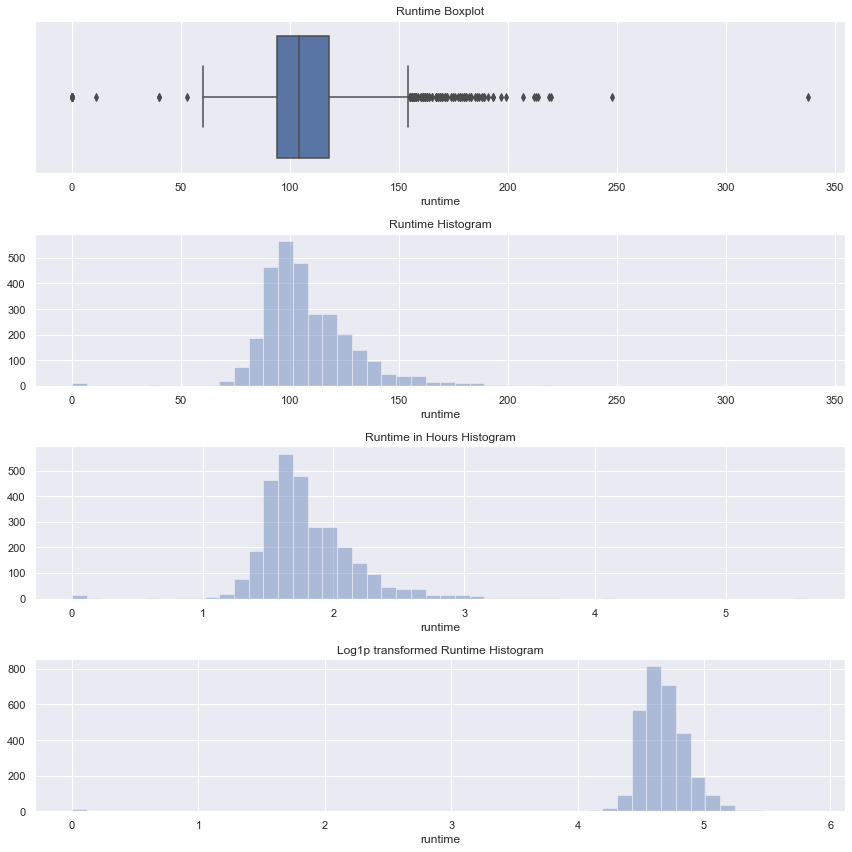

In [59]:
f, ax = plt.subplots(4, figsize=(12,12))

train_df.runtime = train_df.runtime.fillna(train_df.runtime.mode())

sns.boxplot(x = train_df.runtime, ax = ax[0])
ax[0].set_title("Runtime Boxplot")

sns.distplot(a = train_df.runtime, kde = False, ax = ax[1])
ax[1].set_title("Runtime Histogram")

sns.distplot(a = train_df.runtime/60, kde = False, ax = ax[2])
ax[2].set_title("Runtime in Hours Histogram")

sns.distplot(a = np.log1p(train_df.runtime), kde = False, ax = ax[3])
ax[3].set_title("Log1p transformed Runtime Histogram")

f.tight_layout()

In [60]:
train_df["runtime_in_hours"] = train_df.runtime/60
test_df["runtime_in_hours"] = test_df.runtime/60

train_df["log_runtime"] = np.log1p(train_df.runtime)
test_df["log_runtime"] = np.log1p(test_df.runtime)

In [61]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'log_revenue', 'title_len', 'log_title_len', 'overview_len',
       'log_overview_len', 'tagline_len', 'log_tagline_len', 'log_budget',
       'genres_processed', 'num_genres', 'is_english_language',
       'production_companies_processed', 'num_of_production_companies',
       'production_countries_processed', 'log_popularity', 'runtime_in_hours',
       'log_runtime'],
      dtype='object')

#### Release Date preprocessing before EDA and ML

In [62]:
from datetime import datetime

# fill possible NA values with the statistical mode
train_df["release_date"] = train_df["release_date"].fillna(train_df["release_date"].mode()[0])
test_df["release_date"] = test_df["release_date"].fillna(test_df["release_date"].mode()[0])

In [63]:
train_df['temp'] = train_df.release_date.apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

train_df["month"] = train_df.temp.apply(lambda x: x.month)
train_df["season"] = train_df["month"]%4
train_df["year"] = train_df.temp.apply(lambda x: x.year)
train_df["day_of_week"] = train_df.temp.apply(lambda x: x.weekday()+1)
train_df["week_of_year"] = train_df.temp.apply(lambda x: x.isocalendar()[1])

train_df = train_df.drop(['temp'], axis=1)


test_df['temp'] = test_df.release_date.apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

test_df["month"] = test_df.temp.apply(lambda x: x.month)
test_df["season"] = test_df["month"]%4
test_df["year"] = test_df.temp.apply(lambda x: x.year)
test_df["day_of_week"] = test_df.temp.apply(lambda x: x.weekday()+1)
test_df["week_of_year"] = test_df.temp.apply(lambda x: x.isocalendar()[1])

test_df = test_df.drop(['temp'], axis=1)

In [64]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'log_revenue', 'title_len', 'log_title_len', 'overview_len',
       'log_overview_len', 'tagline_len', 'log_tagline_len', 'log_budget',
       'genres_processed', 'num_genres', 'is_english_language',
       'production_companies_processed', 'num_of_production_companies',
       'production_countries_processed', 'log_popularity', 'runtime_in_hours',
       'log_runtime', 'month', 'season', 'year', 'day_of_week',
       'week_of_year'],
      dtype='object')

In [65]:
train_df["day_of_week"] = train_df["day_of_week"].fillna(train_df["day_of_week"].mode()[0])
test_df["day_of_week"] = test_df["day_of_week"].fillna(test_df["day_of_week"].mode()[0])

train_df["year"] = train_df["year"].fillna(train_df["year"].mode()[0])
test_df["year"] = test_df["year"].fillna(test_df["year"].mode()[0])

train_df["month"] = train_df["month"].fillna(train_df["month"].mode()[0])
test_df["month"] = test_df["month"].fillna(test_df["month"].mode()[0])

train_df["week_of_year"] = train_df["week_of_year"].fillna(train_df["week_of_year"].mode()[0])
test_df["week_of_year"] = test_df["week_of_year"].fillna(test_df["week_of_year"].mode()[0])

train_df["season"] = train_df["season"].fillna(train_df["season"].mode()[0])
test_df["season"] = test_df["season"].fillna(test_df["season"].mode()[0])

train_df[["release_date", "month", "year", "day_of_week", "week_of_year", "season"]].head()

,release_date,month,year,day_of_week,week_of_year,season
0,2/20/15,2,2015,5,8,2
1,8/6/04,8,2004,5,32,0
2,10/10/14,10,2014,5,41,2
3,3/9/12,3,2012,5,10,3
4,2/5/09,2,2009,4,6,2


#### Month of Release, which month has most of the releases

Text(0.5, 1.0, 'Number of films per month')

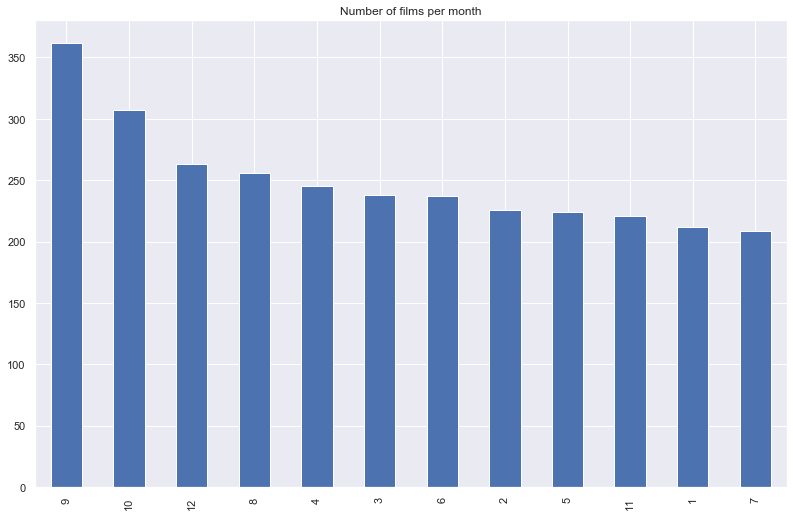

In [66]:
sns.set(rc = {'figure.figsize':(12,8)})

train_df.month.value_counts().plot.bar()
plt.title('Number of films per month')

#### Week of year, which week of the year has most of the releases

Text(0.5, 1.0, 'Number of films per week_of_year')

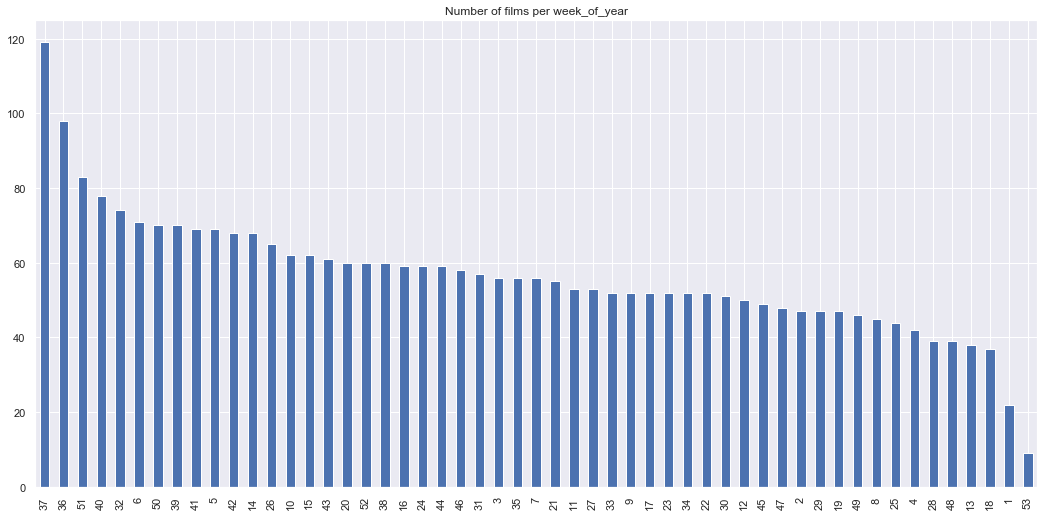

In [67]:
sns.set(rc={'figure.figsize':(16,8)})

train_df.week_of_year.value_counts().plot.bar()
plt.title('Number of films per week_of_year')

#### Season of Release, which season has most of the releases

Text(0.5, 1.0, 'Number of films per season')

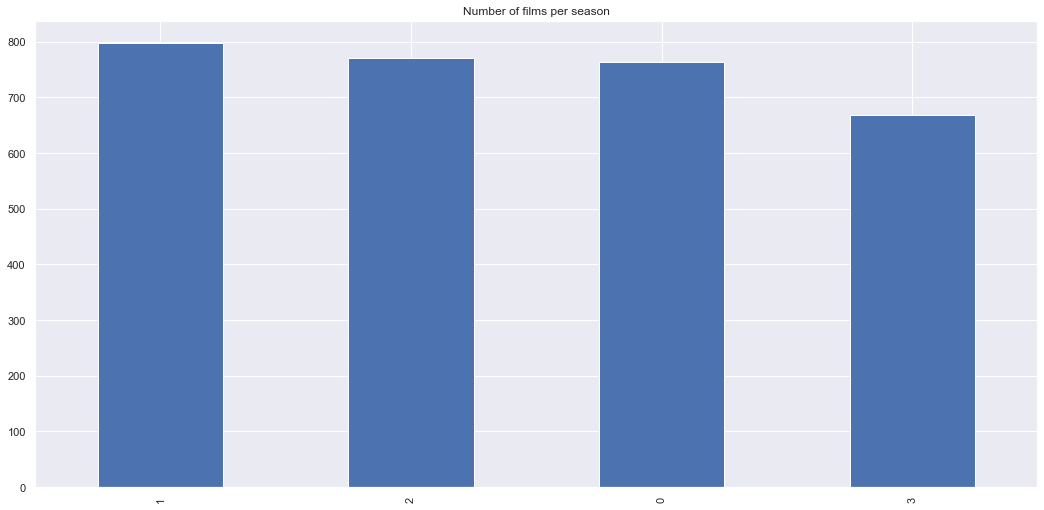

In [68]:
sns.set(rc={'figure.figsize':(16,8)})

train_df.season.value_counts().plot.bar()
plt.title('Number of films per season')

#### Day of Release, which day of the week has most of the releases

Text(0.5, 1.0, 'Number of films per day_of_week')

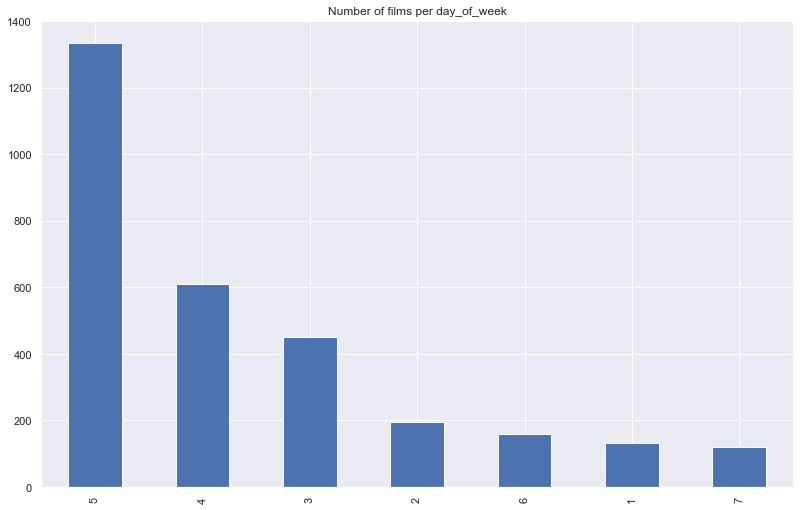

In [69]:
sns.set(rc={'figure.figsize':(12,8)})

train_df.day_of_week.value_counts().plot.bar()
plt.title('Number of films per day_of_week')

#### Year of Release, which year has most of the releases

In [70]:
for i in range(train_df.shape[0]):
    if train_df.year[i] > 2017:
        train_df.year[i] = train_df.year[i] - 100

Text(0.5, 1.0, 'Number of films per year')

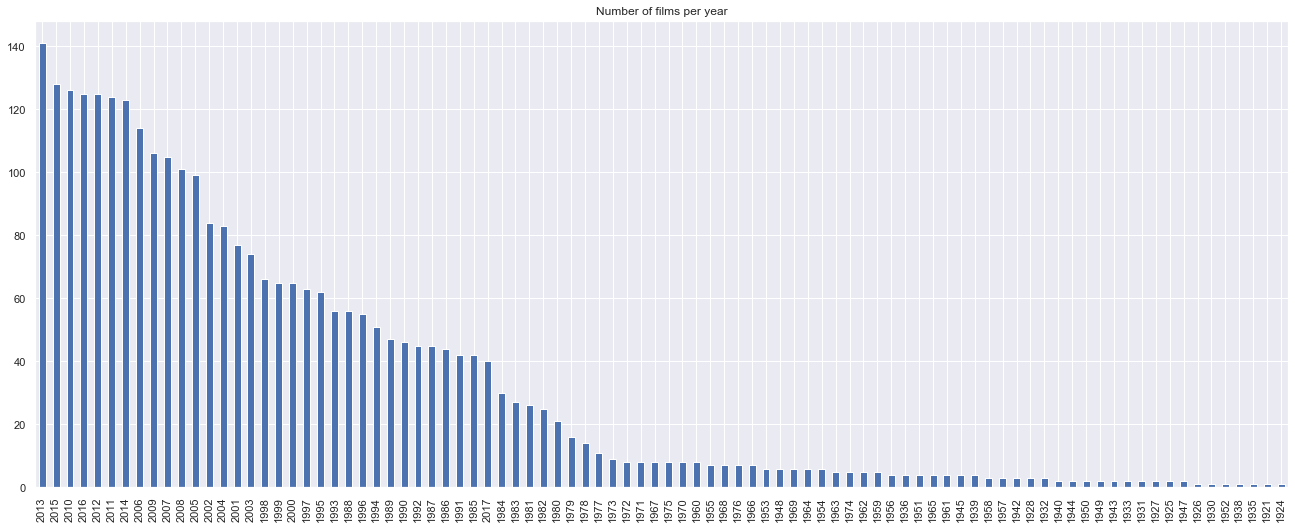

In [71]:
sns.set(rc={'figure.figsize':(20,8)})

train_df.year.value_counts().plot.bar()
plt.title('Number of films per year')

#### Identifying top actors in movies based on mean movies' revenue

In [72]:
import re

actors_dict = {}
size_of_actors = len(train_df) - train_df.cast.isna().sum()

In [73]:
for element in train_df[["revenue", "cast"]].values:
    if type(element[1]) == type(str()):
        
        result = re.findall('name\': \'\w+\s*\w*', element[1])
        result = [x.replace("name\': \'", "") for x in result]

        for actor in result:
            if actor not in actors_dict:
                actors_dict[actor] = element[0]
            else:
                actors_dict[actor] += element[0]

In [74]:
for actor in actors_dict:
    actors_dict[actor] = actors_dict[actor]/size_of_actors

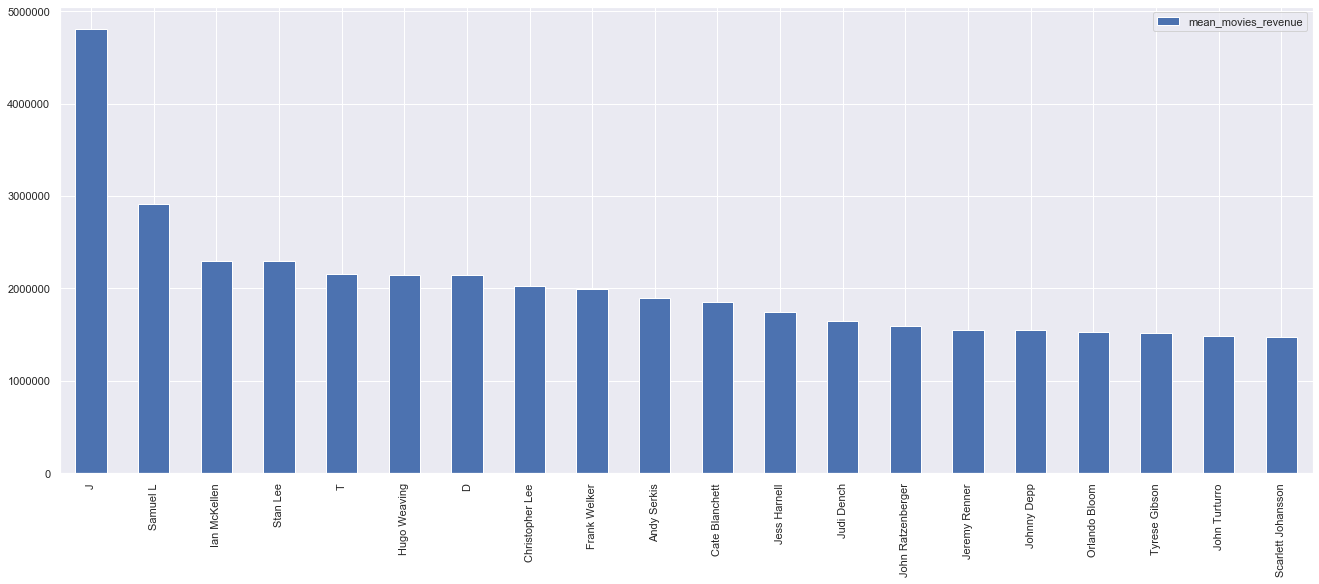

In [75]:
actors_df = pd.DataFrame.from_dict(actors_dict, orient='index', columns=["mean_movies_revenue"])
actors_df.sort_values(by="mean_movies_revenue", ascending=False).head(20).plot.bar()

#### feature engineering, creating the has_top_actor columns

In [76]:
# def find_top_actor_from_cast(top_actor, element):
    
#     result = []
#     if type(element) == type(str()):

#         result = re.findall('name\': \'\w+\s*\w*', element)
#         result = [x.replace("name\': \'", "") for x in result]
        
#     if top_actor in result:
#         return 1
#     else:
#         return 0

In [77]:
# for top_actor in actors_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).index.values:
#     train_df["has_top_actor_"+ top_actor] = train_df.cast.apply(lambda element: find_top_actor_from_cast(top_actor, element))
#     test_df["has_top_actor_"+ top_actor] = test_df.cast.apply(lambda element: find_top_actor_from_cast(top_actor, element))

#### Identifying the top keywords based on mean movie revenue

In [78]:
import re

keywords_dict = {}
size_of_keywords = len(train_df) - train_df.Keywords.isna().sum()

In [79]:
for element in train_df[["revenue", "Keywords"]].values:
    if type(element[1]) == type(str()):
        
        result = re.findall('name\': \'\w+\s*\w*', element[1])
        result = [x.replace("name\': \'", "") for x in result]

        for key in result:
            if key not in keywords_dict:
                keywords_dict[key] = element[0]
            else:
                keywords_dict[key] += element[0]

In [80]:
for key in keywords_dict:
    keywords_dict[key] = keywords_dict[key]/size_of_keywords

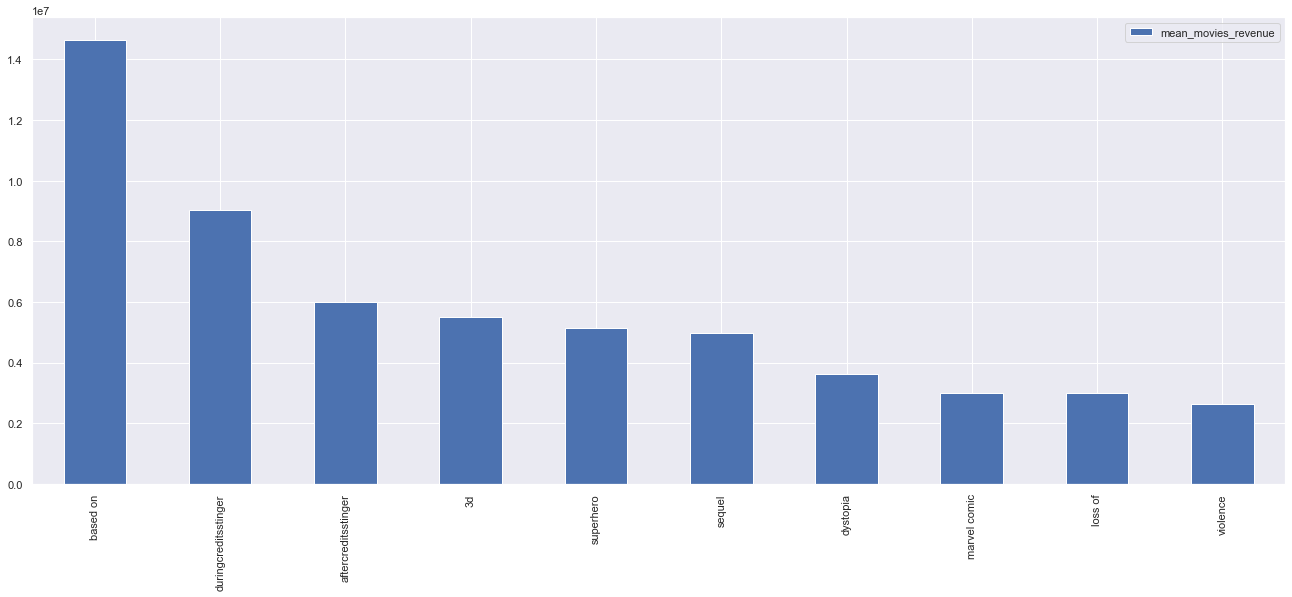

In [81]:
keywords_df = pd.DataFrame.from_dict(keywords_dict, orient='index', columns=["mean_movies_revenue"])
keywords_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).plot.bar()

#### feature engineering has_top_keyword based on mean movies' revenue

In [82]:
# def find_top_keywords_from_cast(top_keyword, element):
    
#     result = []
#     if type(element) == type(str()):

#         result = re.findall('name\': \'\w+\s*\w*', element)
#         result = [x.replace("name\': \'", "") for x in result]
        
#     if top_keyword in result:
#         return 1
#     else:
#         return 0

In [83]:
# for top_keyword in keywords_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).index.values:
#     train_df["has_top_keyword_"+ top_keyword] = train_df.Keywords.apply(lambda element: find_top_keywords_from_cast(top_keyword, element))
#     test_df["has_top_keyword_"+ top_keyword] = test_df.Keywords.apply(lambda element: find_top_keywords_from_cast(top_keyword, element))

#### Cast

In [84]:
train_df["num_of_cast"] = train_df["cast"].str.count("name")
test_df["num_of_cast"] = test_df["cast"].str.count("name")

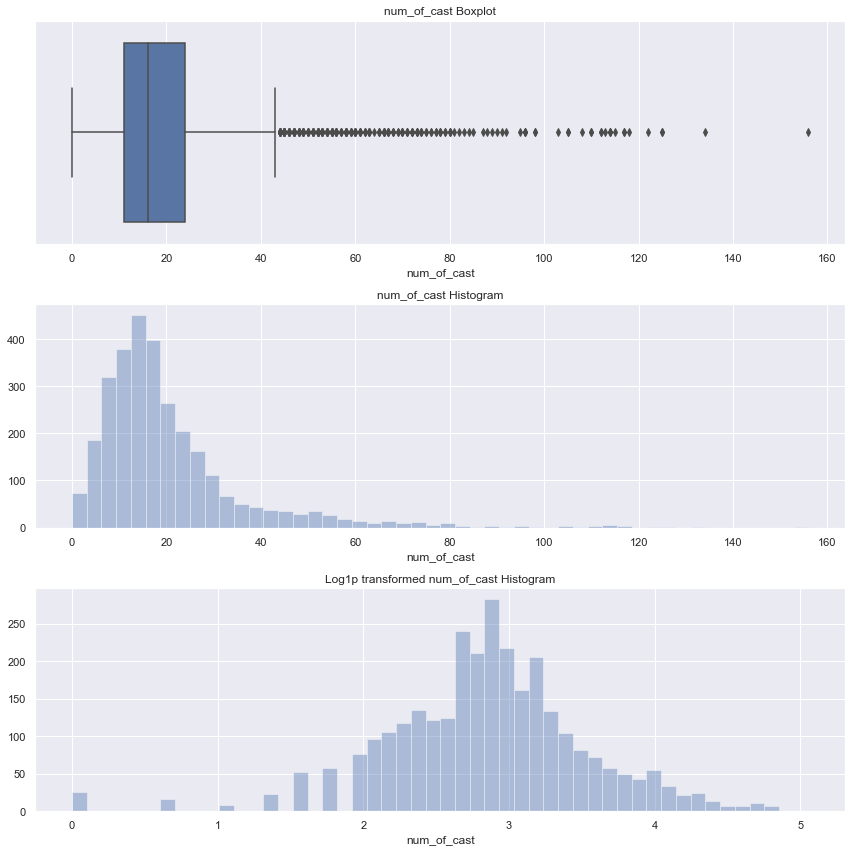

In [85]:
f, ax = plt.subplots(3, figsize=(12,12))

train_df.num_of_cast = train_df.num_of_cast.fillna(0)
test_df.num_of_cast = test_df.num_of_cast.fillna(0)

sns.boxplot(x = train_df.num_of_cast, ax = ax[0])
ax[0].set_title("num_of_cast Boxplot")

sns.distplot(a = train_df.num_of_cast, kde = False, ax = ax[1])
ax[1].set_title("num_of_cast Histogram")

sns.distplot(a = np.log1p(train_df.num_of_cast), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_cast Histogram")

f.tight_layout()


train_df["log_num_of_cast"] = np.log1p(train_df.num_of_cast)
test_df["log_num_of_cast"] = np.log1p(test_df.num_of_cast)

#### Male cast
number of male cast

In [86]:
train_df["num_of_male_cast"] = train_df["cast"].str.count("'gender': 2")
test_df["num_of_male_cast"] = test_df["cast"].str.count("'gender': 2")

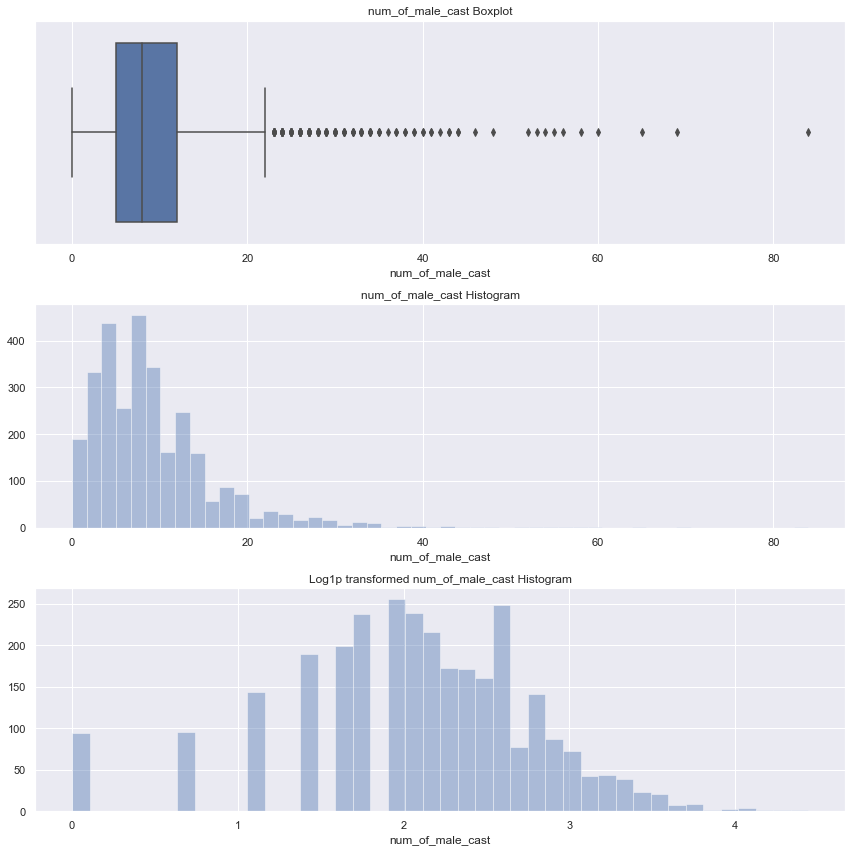

In [87]:
f, ax = plt.subplots(3, figsize=(12,12))

train_df.num_of_male_cast = train_df.num_of_male_cast.fillna(0)
test_df.num_of_male_cast = test_df.num_of_male_cast.fillna(0)

sns.boxplot(x = train_df.num_of_male_cast, ax = ax[0])
ax[0].set_title("num_of_male_cast Boxplot")

sns.distplot(a = train_df.num_of_male_cast, kde = False, ax = ax[1])
ax[1].set_title("num_of_male_cast Histogram")

sns.distplot(a = np.log1p(train_df.num_of_male_cast), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_male_cast Histogram")

f.tight_layout()


train_df["log_num_of_male_cast"] = np.log1p(train_df.num_of_male_cast)
test_df["log_num_of_male_cast"] = np.log1p(test_df.num_of_male_cast)

#### Female cast
number of female cast

In [88]:
train_df["num_of_female_cast"] = train_df["cast"].str.count("'gender': 1")
test_df["num_of_female_cast"] = test_df["cast"].str.count("'gender': 1")

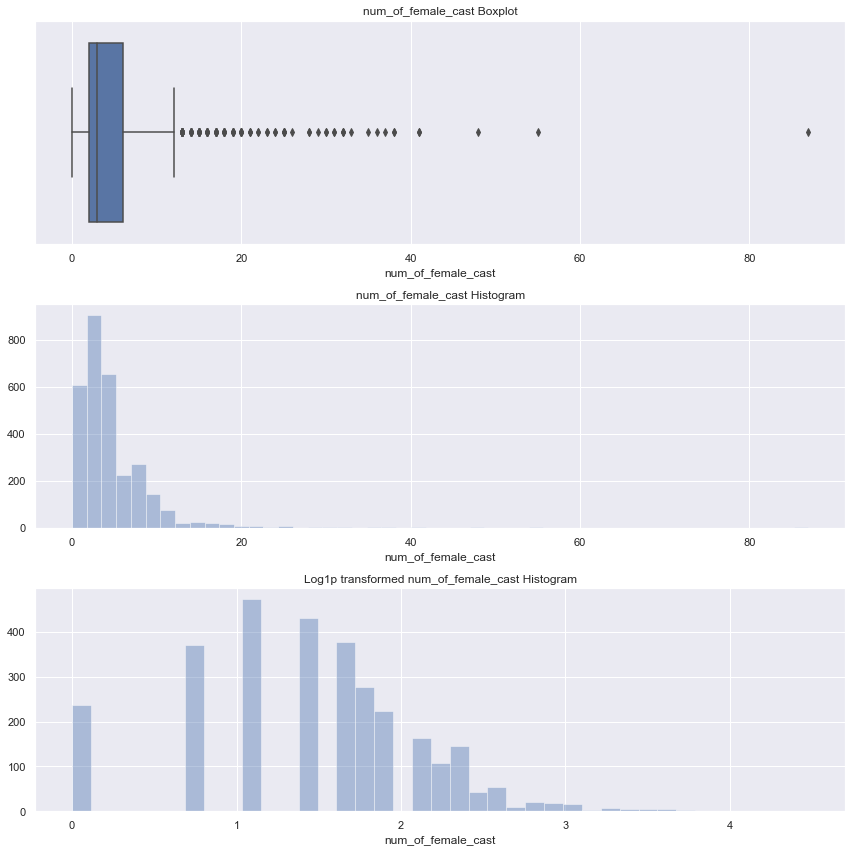

In [89]:
f, ax = plt.subplots(3, figsize=(12,12))

train_df.num_of_female_cast = train_df.num_of_female_cast.fillna(0)
test_df.num_of_female_cast = test_df.num_of_female_cast.fillna(0)

sns.boxplot(x=train_df.num_of_female_cast, ax = ax[0])
ax[0].set_title("num_of_female_cast Boxplot")

sns.distplot(a=train_df.num_of_female_cast, kde = False, ax = ax[1])
ax[1].set_title("num_of_female_cast Histogram")

sns.distplot(a=np.log1p(train_df.num_of_female_cast), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_female_cast Histogram")

f.tight_layout()


train_df["log_num_of_female_cast"] = np.log1p(train_df.num_of_female_cast)
test_df["log_num_of_female_cast"] = np.log1p(test_df.num_of_female_cast)

### Crew
Counting the number of crew

In [90]:
train_df["num_of_crew"] = train_df["crew"].str.count("'job")
test_df["num_of_crew"] = test_df["crew"].str.count("'job")

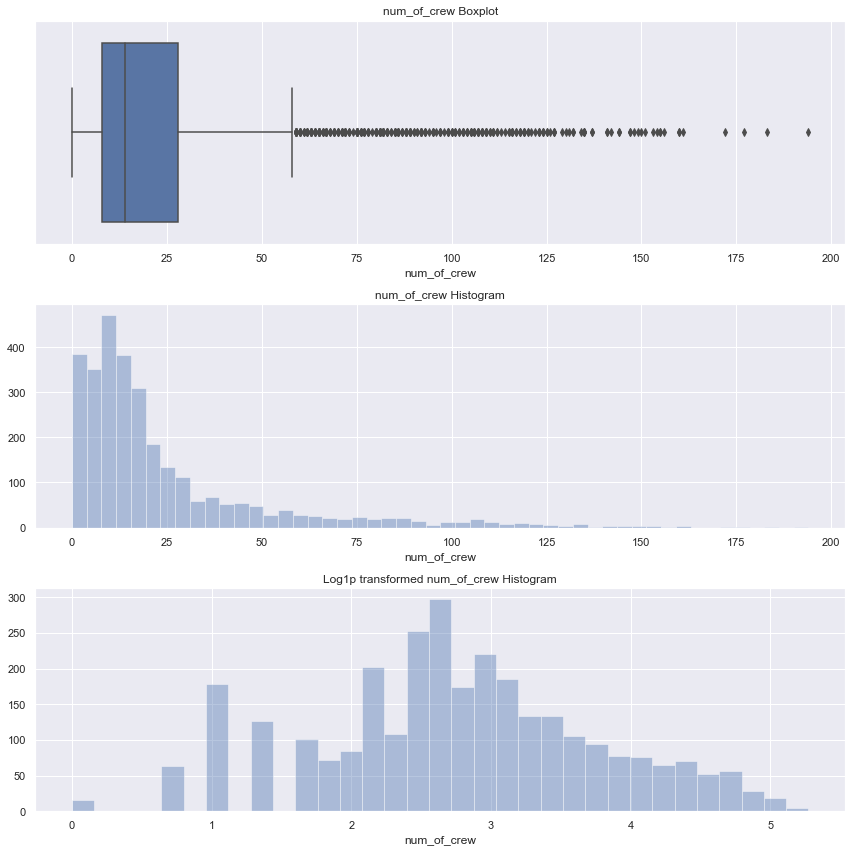

In [91]:
f, ax = plt.subplots(3, figsize=(12,12))

train_df.num_of_crew = train_df.num_of_crew.fillna(0)
test_df.num_of_crew = test_df.num_of_crew.fillna(0)

sns.boxplot(x=train_df.num_of_crew, ax = ax[0])
ax[0].set_title("num_of_crew Boxplot")

sns.distplot(a=train_df.num_of_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_crew Histogram")

sns.distplot(a=np.log1p(train_df.num_of_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_crew Histogram")

f.tight_layout()

train_df["log_num_of_crew"] = np.log1p(train_df.num_of_crew)
test_df["log_num_of_crew"] = np.log1p(test_df.num_of_crew)

### Male Crew
Counting the number of male crew

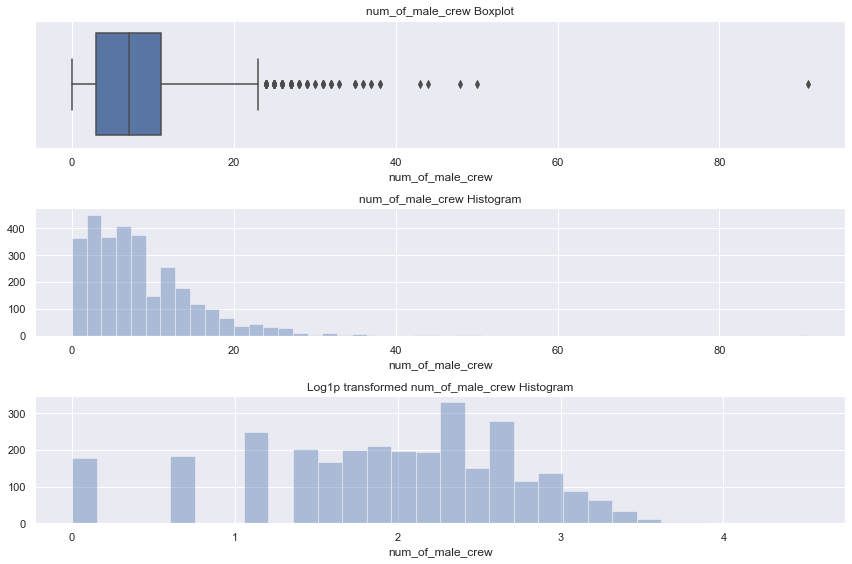

In [92]:
train_df["num_of_male_crew"] = train_df["crew"].str.count("'gender': 2")
test_df["num_of_male_crew"] = test_df["crew"].str.count("'gender': 2")

f, ax = plt.subplots(3, figsize=(12,8))

train_df.num_of_male_crew = train_df.num_of_male_crew.fillna(0)
test_df.num_of_male_crew = test_df.num_of_crew.fillna(0)

sns.boxplot(x=train_df.num_of_male_crew, ax = ax[0])
ax[0].set_title("num_of_male_crew Boxplot")

sns.distplot(a=train_df.num_of_male_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_male_crew Histogram")

sns.distplot(a=np.log1p(train_df.num_of_male_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_male_crew Histogram")

f.tight_layout()


train_df["log_num_of_male_crew"] = np.log1p(train_df.num_of_male_crew)
test_df["log_num_of_male_crew"] = np.log1p(test_df.num_of_male_crew)

### Female Crew
Counting the number of female crew

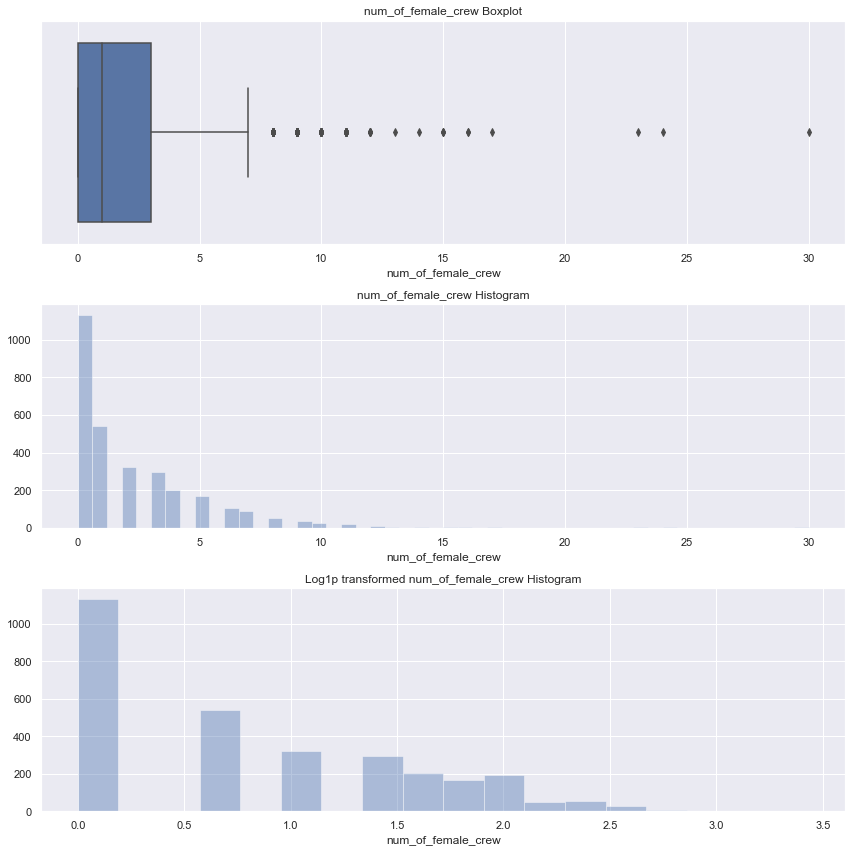

In [93]:
train_df["num_of_female_crew"] = train_df["crew"].str.count("'gender': 1")
test_df["num_of_female_crew"] = test_df["crew"].str.count("'gender': 1")

f, ax = plt.subplots(3, figsize=(12,12))

train_df.num_of_female_crew = train_df.num_of_female_crew.fillna(0)
test_df.num_of_female_crew = test_df.num_of_female_crew.fillna(0)

sns.boxplot(x=train_df.num_of_female_crew, ax = ax[0])
ax[0].set_title("num_of_female_crew Boxplot")

sns.distplot(a=train_df.num_of_female_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_female_crew Histogram")

sns.distplot(a=np.log1p(train_df.num_of_female_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_female_crew Histogram")

f.tight_layout()


train_df["log_num_of_female_crew"] = np.log1p(train_df.num_of_female_crew)
test_df["log_num_of_female_crew"] = np.log1p(test_df.num_of_female_crew)

### Identifying top directors based on average movie revenue

In [94]:
# import re

# directors_dict = {}
# size_of_crew = len(train_df) - train_df.crew.isna().sum()

# for element in train_df[["revenue", "crew"]].values:
#     if type(element[1]) == type(str()):
        
#         result = re.findall('Director\', \'name\': \'\w+\s*\w*', element[1])
#         result = [x.replace("Director\', \'name\': \'", "") for x in result]

#         for key in result:
#             if key not in directors_dict:
#                 directors_dict[key] = element[0]
#             else:
#                 directors_dict[key] += element[0]
                
# for key in directors_dict:
#     directors_dict[key] = directors_dict[key]/size_of_crew
    
# directors_df = pd.DataFrame.from_dict(directors_dict, orient='index', columns=["mean_movies_revenue"])
# directors_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).plot.bar()

### feature engineering, finding has_top_director in movies

In [95]:
# def find_top_directors_from_crew(top_director, element):
    
#     result = []
#     if type(element) == type(str()):

#         result = re.findall('Director\', \'name\': \'\w+\s*\w*', element)
#         result = [x.replace("Director\', \'name\': \'", "") for x in result]
        
#     if top_director in result:
#         return 1
#     else:
#         return 0

# for top_director in directors_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).index.values:
#     train_df["has_top_director_"+ top_director] = train_df.crew.apply(lambda element: find_top_directors_from_crew(top_director, element))
#     test_df["has_top_director_"+ top_director] = test_df.crew.apply(lambda element: find_top_directors_from_crew(top_director, element))

### Identifying top Producers based on average movie salary

In [96]:
# import re

# producers_dict = {}
# size_of_crew = len(train_df) - train_df.crew.isna().sum()

# for element in train_df[["revenue", "crew"]].values:
#     if type(element[1]) == type(str()):
        
#         result = re.findall('Producer\', \'name\': \'\w+\s*\w*', element[1])
#         result = [x.replace("Producer\', \'name\': \'", "") for x in result]

#         for key in result:
#             if key not in producers_dict:
#                 producers_dict[key] = element[0]
#             else:
#                 producers_dict[key] += element[0]
                
# for key in producers_dict:
#     producers_dict[key] = producers_dict[key]/size_of_crew
    
# producers_df = pd.DataFrame.from_dict(producers_dict, orient='index', columns=["mean_movies_revenue"])
# producers_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).plot.bar()

### feature engineering, finding has_top_producers in movies

In [97]:
# def find_top_producers_from_crew(top_producer, element):
    
#     result = []
#     if type(element) == type(str()):

#         result = re.findall('Director\', \'name\': \'\w+\s*\w*', element)
#         result = [x.replace("Director\', \'name\': \'", "") for x in result]
        
#     if top_producer in result:
#         return 1
#     else:
#         return 0

# for top_producer in producers_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).index.values:
#     train_df["has_top_producer_"+ top_producer] = train_df.crew.apply(lambda element: find_top_producers_from_crew(top_producer, element))
#     test_df["has_top_producer_"+ top_producer] = test_df.crew.apply(lambda element: find_top_producers_from_crew(top_producer, element))

#### Number of Directors in a movie

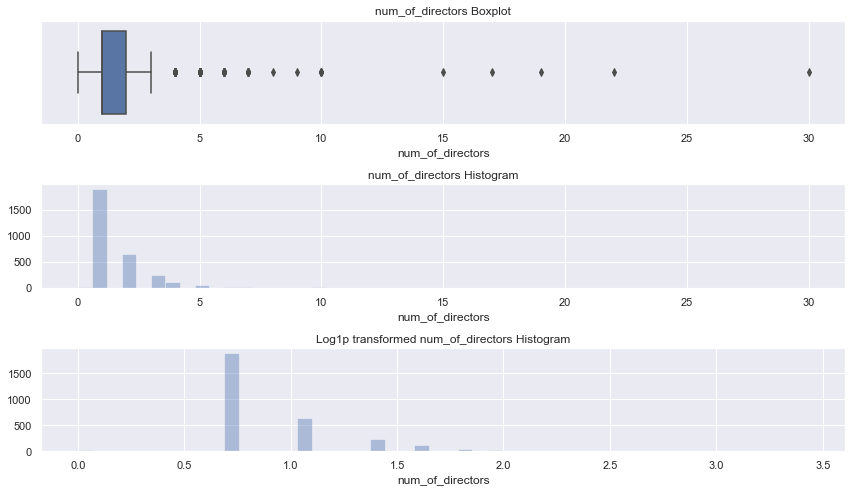

In [98]:
train_df["num_of_directors"] = train_df["crew"].str.count("Directing")
test_df["num_of_directors"] = test_df["crew"].str.count("Directing")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_directors = train_df.num_of_directors.fillna(0)
test_df.num_of_directors = test_df.num_of_directors.fillna(0)

sns.boxplot(x=train_df.num_of_directors, ax = ax[0])
ax[0].set_title("num_of_directors Boxplot")
sns.distplot(a=train_df.num_of_directors, kde = False, ax = ax[1])
ax[1].set_title("num_of_directors Histogram")
sns.distplot(a=np.log1p(train_df.num_of_directors), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_directors Histogram")
f.tight_layout()


train_df["log_num_of_directors"] = np.log1p(train_df.num_of_directors)
test_df["log_num_of_directors"] = np.log1p(test_df.num_of_directors)

#### Number of Producers

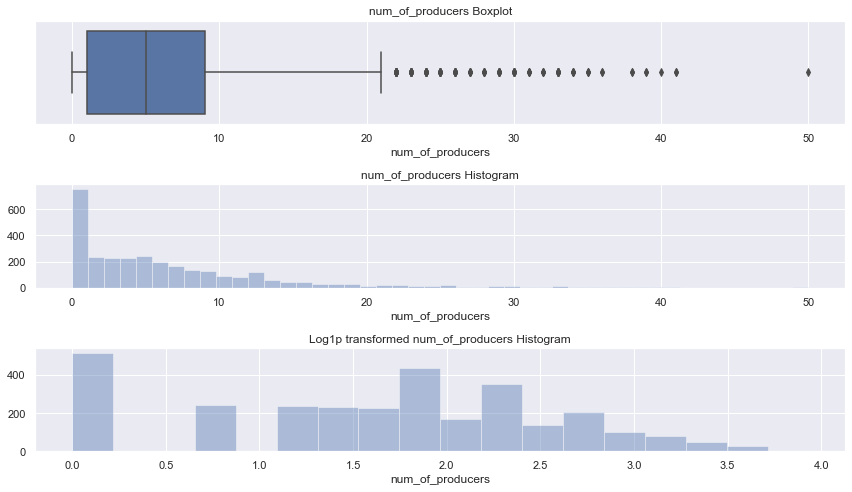

In [99]:
train_df["num_of_producers"] = train_df["crew"].str.count("Production")
test_df["num_of_producers"] = test_df["crew"].str.count("Production")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_producers = train_df.num_of_producers.fillna(0)
test_df.num_of_producers = test_df.num_of_producers.fillna(0)

sns.boxplot(x=train_df.num_of_producers, ax = ax[0])
ax[0].set_title("num_of_producers Boxplot")
sns.distplot(a=train_df.num_of_producers, kde = False, ax = ax[1])
ax[1].set_title("num_of_producers Histogram")
sns.distplot(a=np.log1p(train_df.num_of_producers), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_producers Histogram")
f.tight_layout()


train_df["log_num_of_producers"] = np.log1p(train_df.num_of_producers)
test_df["log_num_of_producers"] = np.log1p(test_df.num_of_producers)

#### Number of Writers

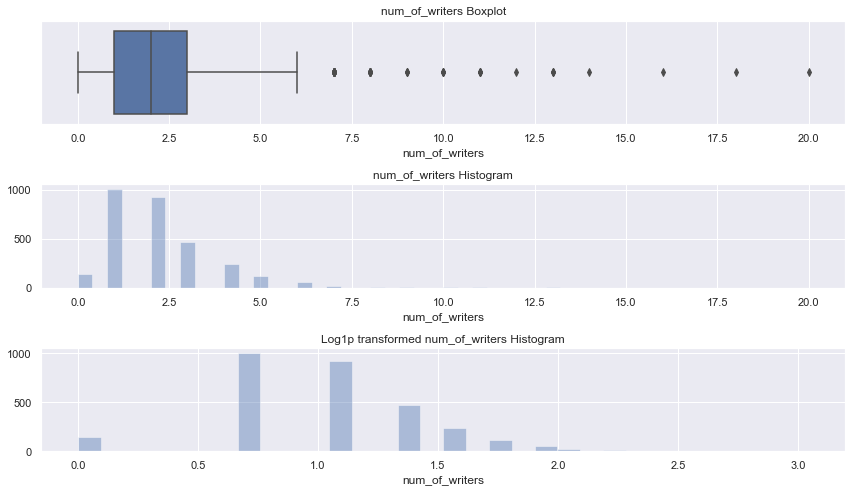

In [100]:
train_df["num_of_writers"] = train_df["crew"].str.count("Writing")
test_df["num_of_writers"] = test_df["crew"].str.count("Writing")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_writers = train_df.num_of_writers.fillna(0)
test_df.num_of_writers = test_df.num_of_writers.fillna(0)

sns.boxplot(x=train_df.num_of_writers, ax = ax[0])
ax[0].set_title("num_of_writers Boxplot")
sns.distplot(a=train_df.num_of_writers, kde = False, ax = ax[1])
ax[1].set_title("num_of_writers Histogram")
sns.distplot(a=np.log1p(train_df.num_of_writers), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_writers Histogram")
f.tight_layout()


train_df["log_num_of_writers"] = np.log1p(train_df.num_of_writers)
test_df["log_num_of_writers"] = np.log1p(test_df.num_of_writers)

#### Production Countries

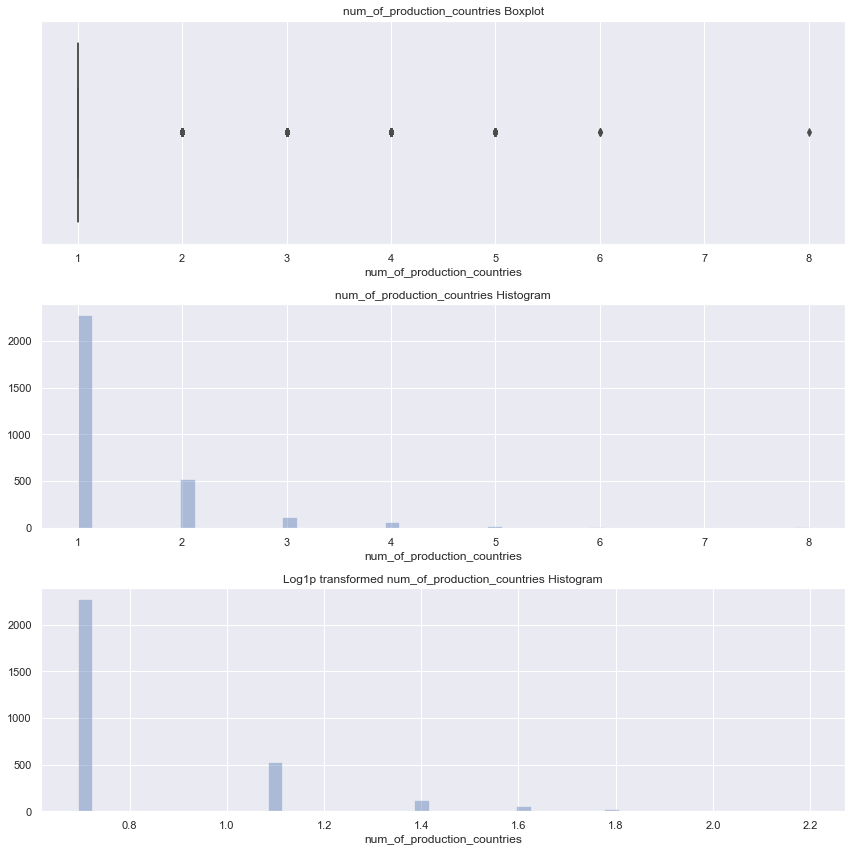

In [109]:
train_df["num_of_production_countries"] = train_df.production_countries_processed.apply(len)
test_df["num_of_production_countries"] = test_df.production_countries_processed.apply(len)

f, ax = plt.subplots(3, figsize=(12,12))

train_df.num_of_production_countries = train_df.num_of_production_countries.fillna(0)
test_df.num_of_production_countries = test_df.num_of_production_countries.fillna(0)

sns.boxplot(x=train_df.num_of_production_countries, ax = ax[0])
ax[0].set_title("num_of_production_countries Boxplot")

sns.distplot(a=train_df.num_of_production_countries, kde = False, ax = ax[1])
ax[1].set_title("num_of_production_countries Histogram")

sns.distplot(a=np.log1p(train_df.num_of_production_countries), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_production_countries Histogram")

f.tight_layout()


train_df["log_num_of_production_countries"] = np.log1p(train_df.num_of_production_countries)
test_df["log_num_of_production_countries"] = np.log1p(test_df.num_of_production_countries)

#### Number of Genres in a movie

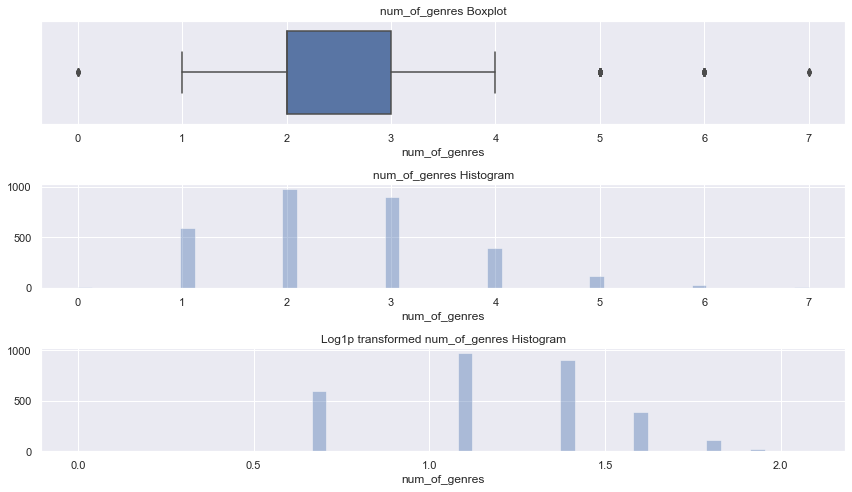

In [110]:
train_df["num_of_genres"] = train_df.genres_processed.apply(len)
test_df["num_of_genres"] = test_df.genres_processed.apply(len)

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_genres = train_df.num_of_genres.fillna(0)
test_df.num_of_genres = test_df.num_of_genres.fillna(0)

sns.boxplot(x=train_df.num_of_genres, ax = ax[0])
ax[0].set_title("num_of_genres Boxplot")
sns.distplot(a=train_df.num_of_genres, kde = False, ax = ax[1])
ax[1].set_title("num_of_genres Histogram")
sns.distplot(a=np.log1p(train_df.num_of_genres), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_genres Histogram")
f.tight_layout()


train_df["log_num_of_genres"] = np.log1p(train_df.num_of_genres)
test_df["log_num_of_genres"] = np.log1p(test_df.num_of_genres)

### EDA - Bivariate Analysis

#### Bivariate Analysis for numerical features

In [111]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'log_revenue', 'title_len', 'log_title_len', 'overview_len',
       'log_overview_len', 'tagline_len', 'log_tagline_len', 'log_budget',
       'genres_processed', 'num_genres', 'is_english_language',
       'production_companies_processed', 'num_of_production_companies',
       'production_countries_processed', 'log_popularity', 'runtime_in_hours',
       'log_runtime', 'month', 'season', 'year', 'day_of_week', 'week_of_year',
       'num_of_cast', 'log_num_of_cast', 'num_of_male_cast',
       'log_num_of_male_cast', 'num_of_female_cast', 'log_num_of_female_cast',
       'num_of_crew', 'log_num_of_crew', 'num_of_male_crew',
       '

In [112]:
sns.set(rc = {'figure.figsize':(20,27)})

# Compute the correlation matrix
corr = train_df[["revenue", "budget", "popularity", "runtime", "num_of_cast", "num_of_male_cast",
                 "num_of_female_cast",
                 "num_genres", "num_of_production_countries", "day_of_week", "month", "year", "week_of_year", "season",
                 "title_len", "overview_len", "tagline_len",
                 "num_of_directors", "num_of_producers", "num_of_editors", "num_of_art_crew", "num_of_sound_crew",
                 "num_of_costume_crew", "num_of_camera_crew", "num_of_visual_effects_crew", "num_of_lighting_crew",
                 "num_of_other_crew"]].corr()

Text(0.5, 1, 'Correlation between numerical features')

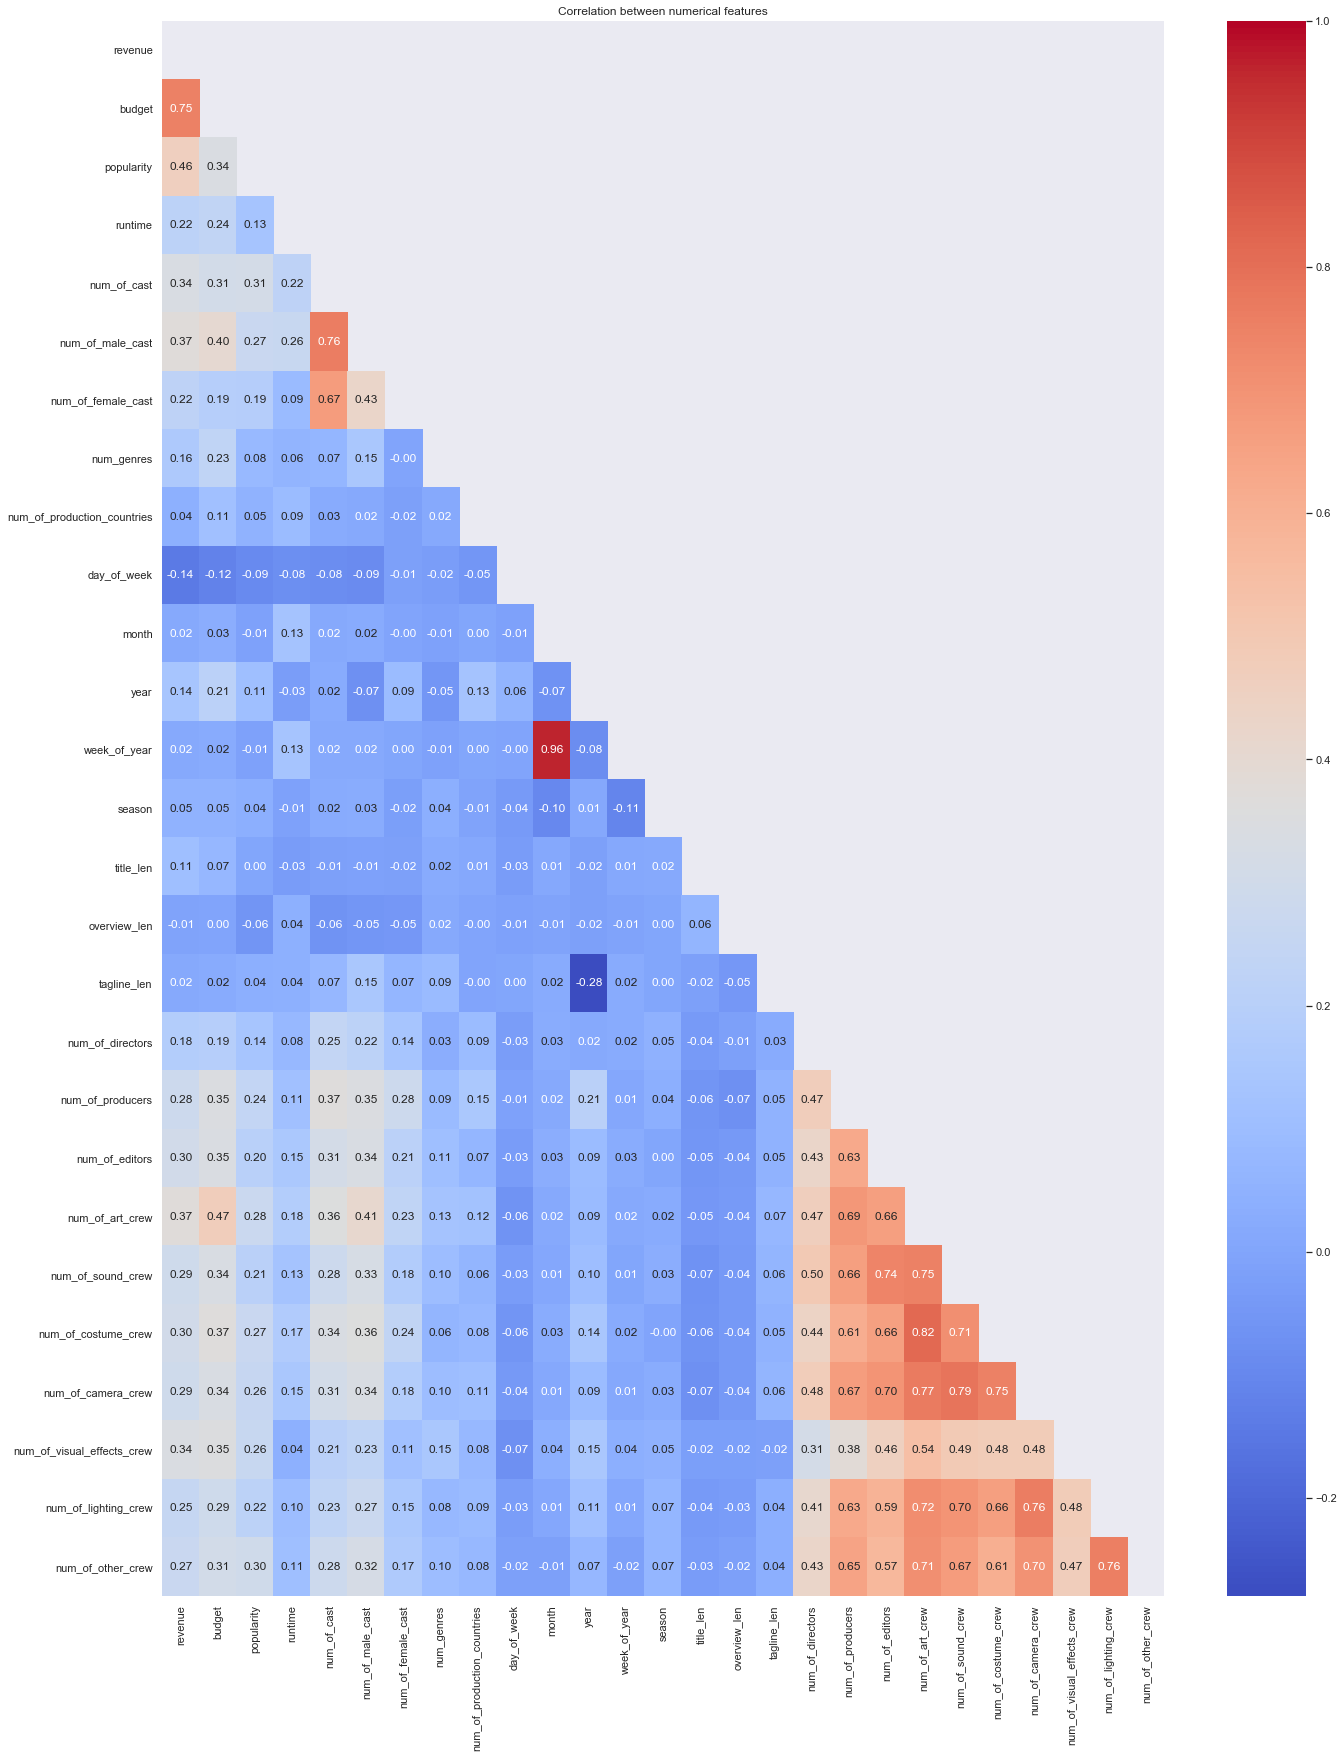

In [113]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm')

plt.title("Correlation between numerical features")

#### Bivariate Analysis for log-transformed numerical features

Text(0.5, 1, 'Correlation between log1p transformed numerical features')

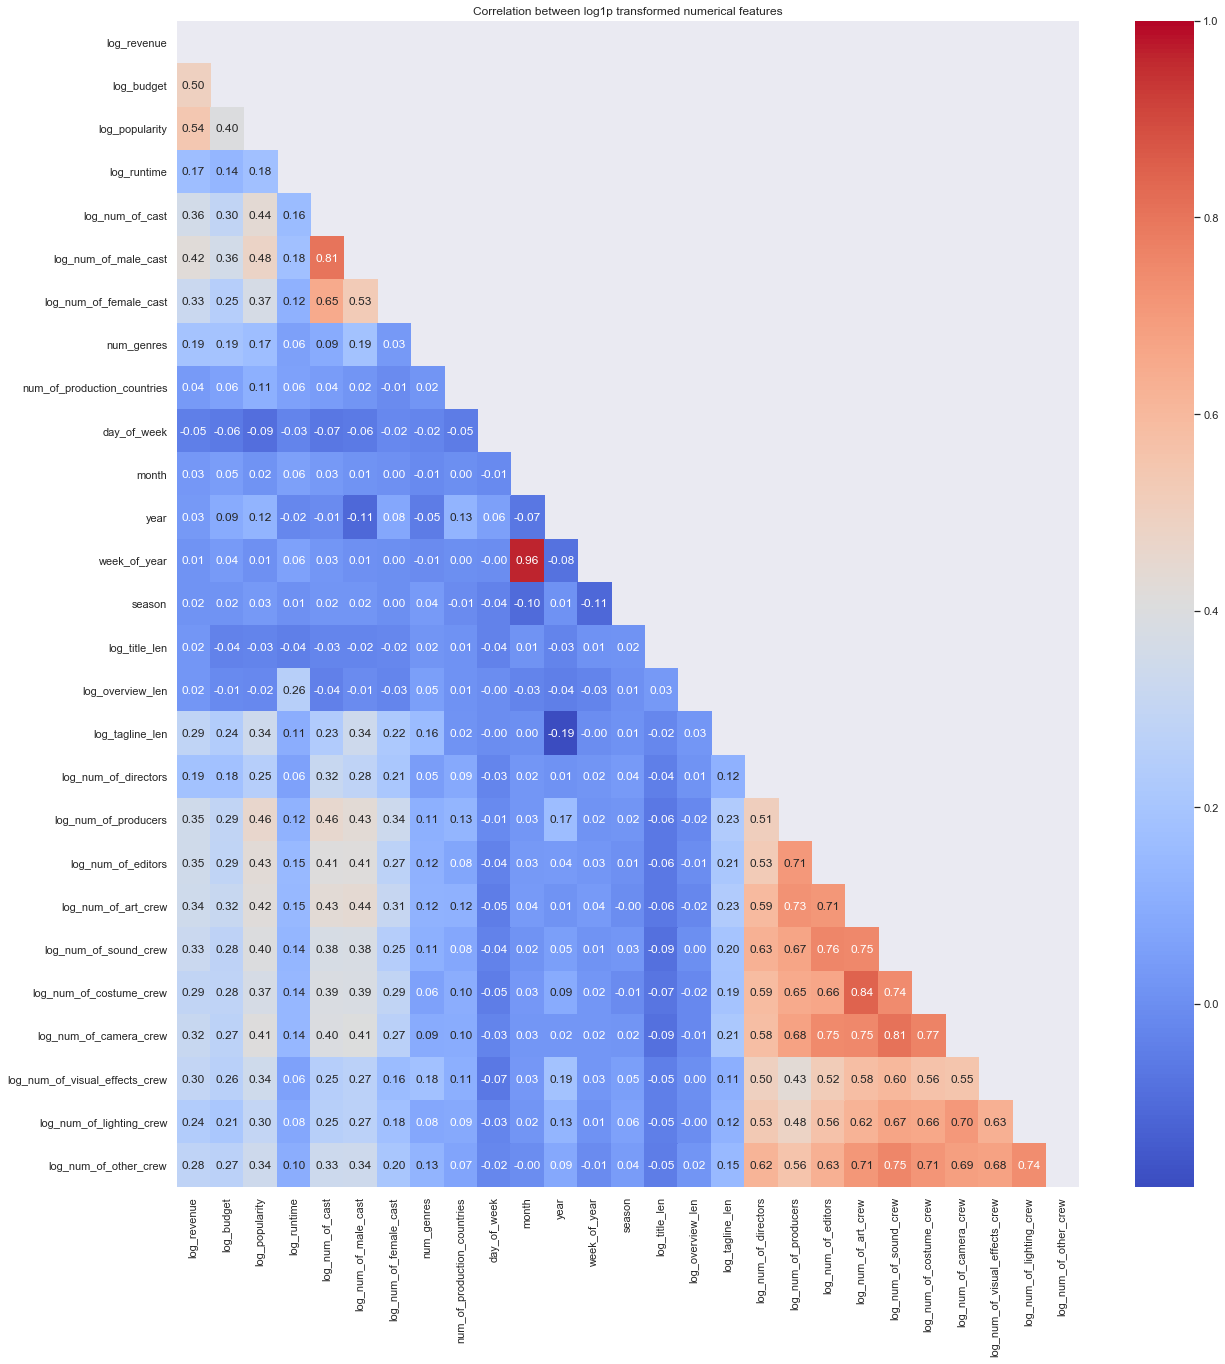

In [114]:
sns.set(rc = {'figure.figsize':(18,20)})

# Compute the correlation matrix
corr = train_df[["log_revenue", "log_budget", "log_popularity", "log_runtime",
                 "log_num_of_cast", "log_num_of_male_cast",
                 "log_num_of_female_cast", "num_genres", "num_of_production_countries",
                "day_of_week", "month", "year", "week_of_year", "season",
                "log_title_len", "log_overview_len", "log_tagline_len",
                "log_num_of_directors", "log_num_of_producers", "log_num_of_editors", "log_num_of_art_crew", "log_num_of_sound_crew",
                       "log_num_of_costume_crew", "log_num_of_camera_crew", "log_num_of_visual_effects_crew", "log_num_of_lighting_crew",
                        "log_num_of_other_crew"]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm')

plt.title("Correlation between log1p transformed numerical features")

### Bivariate Analysis and Feature Engineering

#### has_collection and revenue

In [115]:
train_df['has_collection'] = [0 if pd.isnull(x) else 1 for x in train_df['belongs_to_collection']]
test_df['has_collection'] = [0 if pd.isnull(x) else 1 for x in test_df['belongs_to_collection']]
print(train_df['has_collection'].value_counts())

0    2396
1     604
Name: has_collection, dtype: int64


Text(0.5, 1.0, 'Revenue for film with and without being in a collection')

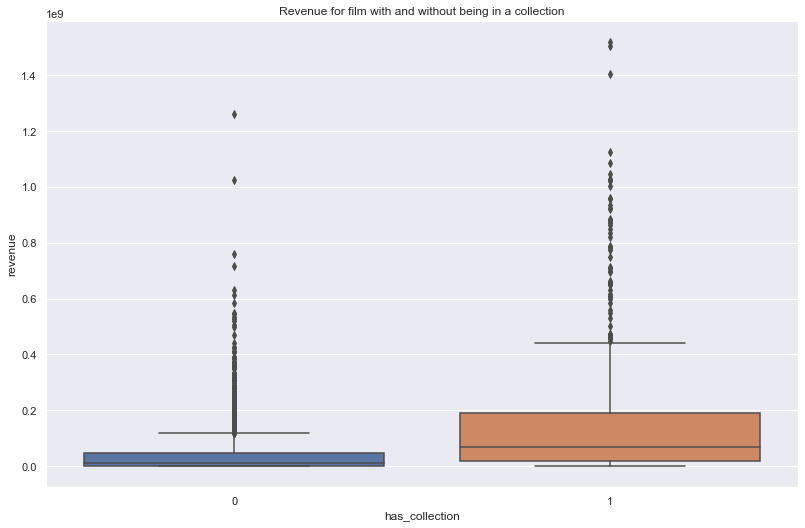

In [116]:
sns.set(rc = {'figure.figsize':(12, 8)})
sns.boxplot(x = 'has_collection', y = 'revenue', data = train_df)
plt.title('Revenue for film with and without being in a collection')

#### homepage and revenue

In [117]:
train_df['has_homepage'] = [0 if pd.isnull(x) else 1 for x in train_df['homepage']]
test_df['has_homepage'] = [0 if pd.isnull(x) else 1 for x in test_df['homepage']]
print(train_df['has_homepage'].value_counts())

0    2054
1     946
Name: has_homepage, dtype: int64


Text(0.5, 1.0, 'Revenue for film with and without homepage')

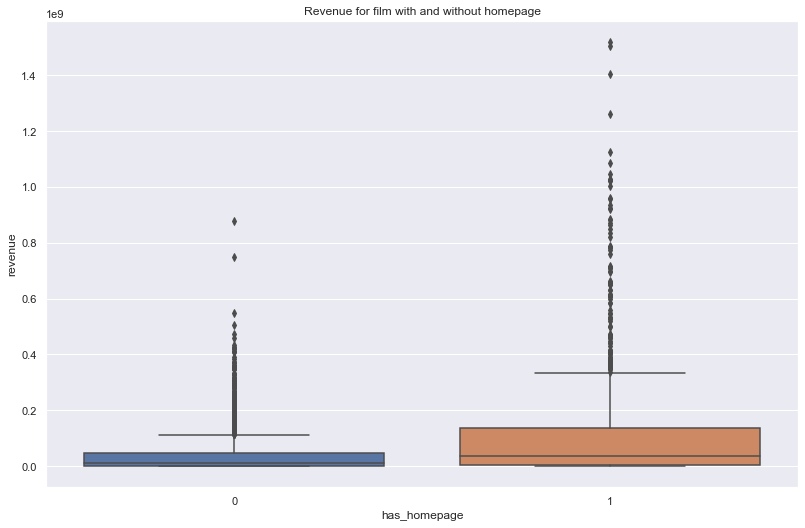

In [118]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='has_homepage', y='revenue', data=train_df)
plt.title('Revenue for film with and without homepage')

#### tagline and revenue

In [119]:
train_df['has_tag'] = [0 if len(x) == 0 else 1 for x in train_df['tagline']]
test_df['has_tag'] = [0 if len(x) == 0 else 1 for x in test_df['tagline']]
print(train_df['has_tag'].value_counts())

1    2403
0     597
Name: has_tag, dtype: int64


Text(0.5, 1.0, 'Revenue for film with and without tagline')

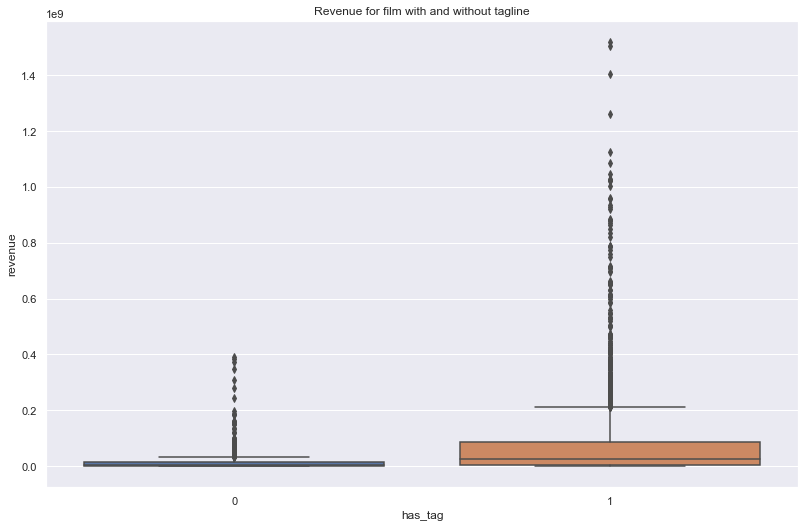

In [120]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='has_tag', y='revenue', data=train_df)
plt.title('Revenue for film with and without tagline')

#### Number of Genres per movie and revenues

Text(0.5, 1.0, 'Revenues for films with multiple genres')

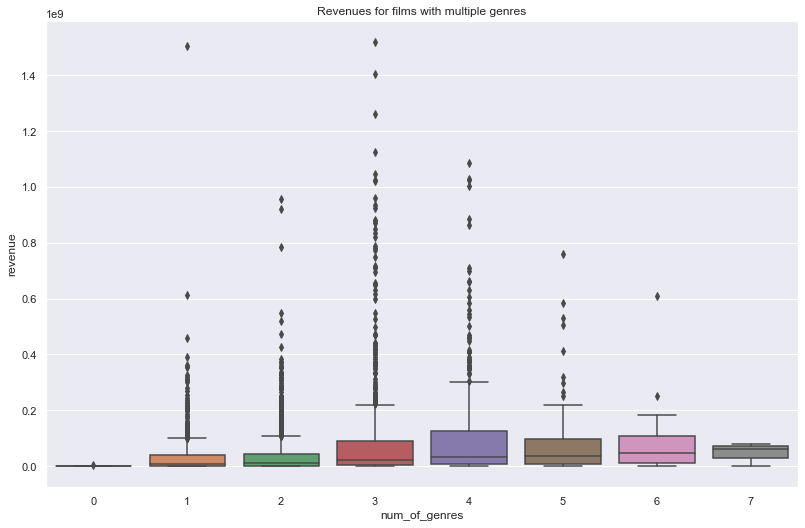

In [121]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='num_of_genres', y='revenue', data=train_df)
plt.title('Revenues for films with multiple genres')

#### Bivariate Analysis between each genre and revenue

In [122]:
# for i, g in enumerate(genres_df.index.values):
#     genres_df.loc[g, "median_salary"] = train_df[train_df['isGenre_' + g]==1].revenue.median()

In [123]:
# genres_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10)

In [124]:
# genres_df.sort_values(by=["median_salary"], ascending=False).median_salary.plot.bar()
# plt.title("Sorted movie genres by median revenue")

In [125]:
# for i, p in enumerate(genres_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10).index.values):
#     train_df['isTopGenre_' + p] = train_df['genres_processed'].apply(lambda x: 1 if p in x else 0)
#     train_df['isTopGenre_Other'] = train_df['genres_processed'].apply(lambda x: 1 if p not in x else 0)
#     test_df['isTopGenre_' + p] = test_df['genres_processed'].apply(lambda x: 1 if p in x else 0)
#     test_df['isTopGenre_Other'] = test_df['genres_processed'].apply(lambda x: 1 if p not in x else 0)

In [126]:
# f, ax = plt.subplots(len(genres_df.index.values), 1, figsize=(15,160))

# for i, g in enumerate(genres_df.index.values):
#     sns.boxplot(x=train_df['isGenre_' + g], y='revenue', ax=ax[i], data=train_df)
#     ax[i].set_title('isGenre_' + g +" and revenue boxplot")
# f.tight_layout()

#### original_language and revenue

Text(0.5, 1.0, 'Revenue for a movie and its and original_language')

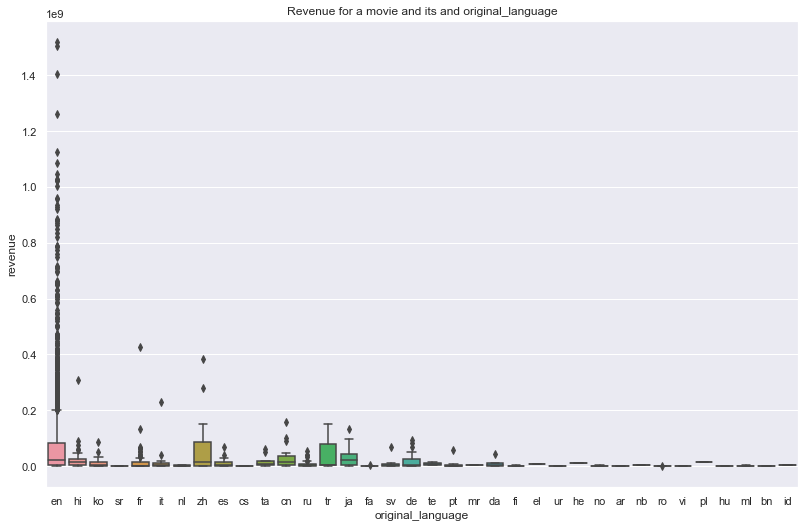

In [127]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='original_language', y='revenue', data=train_df)
plt.title('Revenue for a movie and its and original_language')

#### English and non english movies vs revenue

Text(0.5, 1.0, 'Revenue for a movie in contrast with english and non-english language')

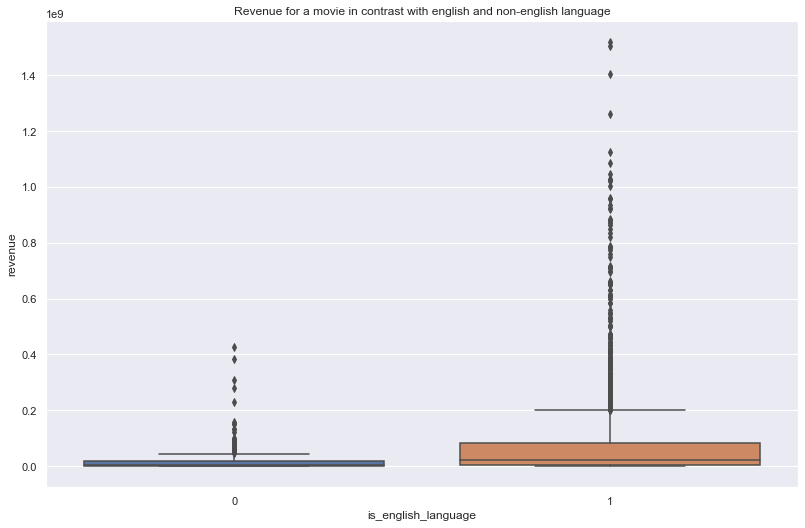

In [128]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='is_english_language', y='revenue', data=train_df)
plt.title('Revenue for a movie in contrast with english and non-english language')

#### production country and revenue

Text(0.5, 1.0, 'number of production countries for a movie and revenue')

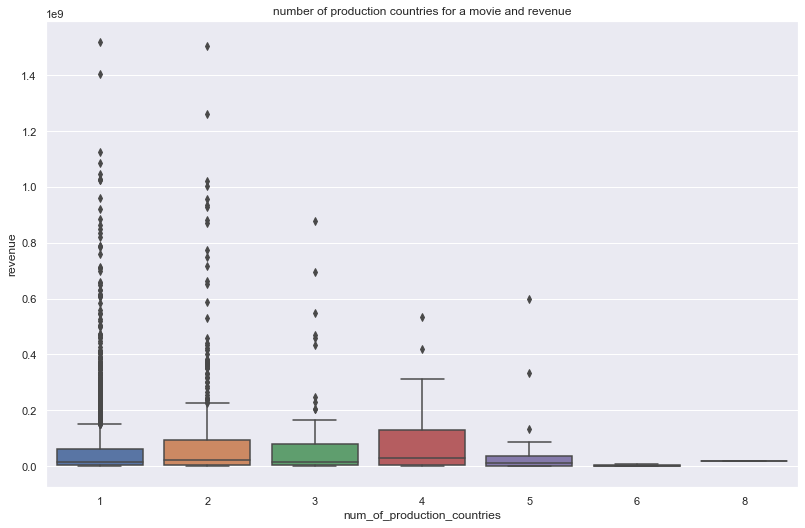

In [129]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='num_of_production_countries', y='revenue', data=train_df)
plt.title('number of production countries for a movie and revenue')

In [130]:
# f, ax = plt.subplots(len(production_countries_df.index.values), 1, figsize=(15,350))

# for i, c in enumerate(production_countries_df.index.values):
#     sns.boxplot(x=train_df['isProductionCountry_' + c], y='revenue', ax=ax[i], data=train_df)
#     ax[i].set_title('isProductionCountry_' + c +" and revenue boxplot")
# f.tight_layout()

In [131]:
# for i, c in enumerate(production_countries_df.index.values):
#     production_countries_df.loc[c, "median_salary"] = train_df[train_df['isProductionCountry_' + c]==1].revenue.median()

# production_countries_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10)

In [132]:
# for i, p in enumerate(production_countries_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10).index.values):
#     train_df['isTopProductionCountry_' + p] = train_df['production_countries_processed'].apply(lambda x: 1 if p in x else 0)
#     test_df['isTopProductionCountry_' + p] = test_df['production_countries_processed'].apply(lambda x: 1 if p in x else 0)

#### Day of the week when the movie released and revenue

Text(0.5, 1.0, 'day_of_week when the movie release and revenue')

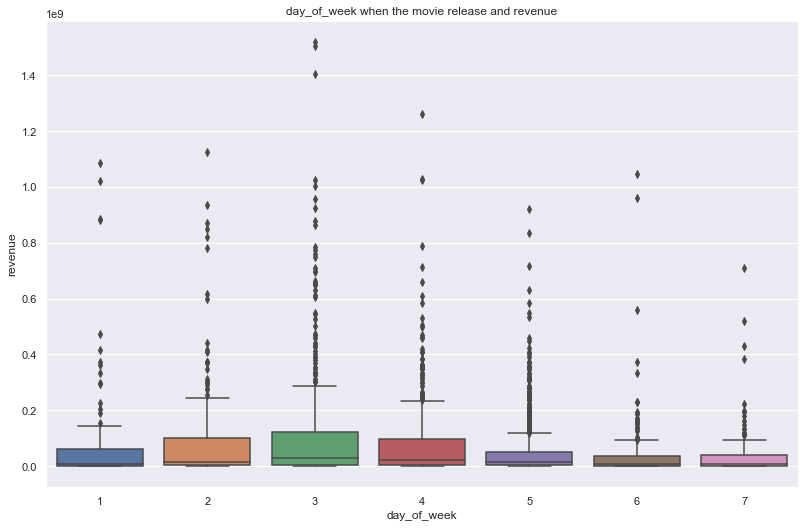

In [133]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='day_of_week', y='revenue', data=train_df)
plt.title('day_of_week when the movie release and revenue')

#### Week of year when the movie released and revenue

Text(0.5, 1.0, 'day_of_week when the movie release and revenue')

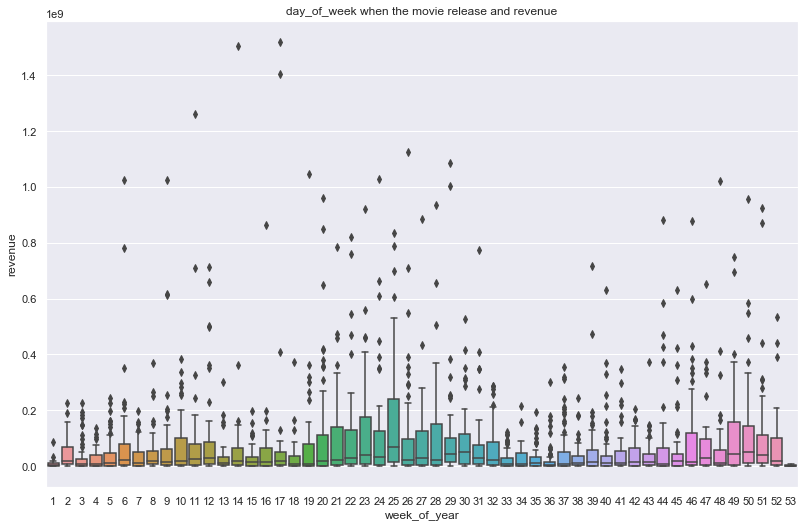

In [134]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='week_of_year', y='revenue', data=train_df)
plt.title('day_of_week when the movie release and revenue')

#### Month when the movie released and revenue

Text(0.5, 1.0, 'month when the movie release and revenue')

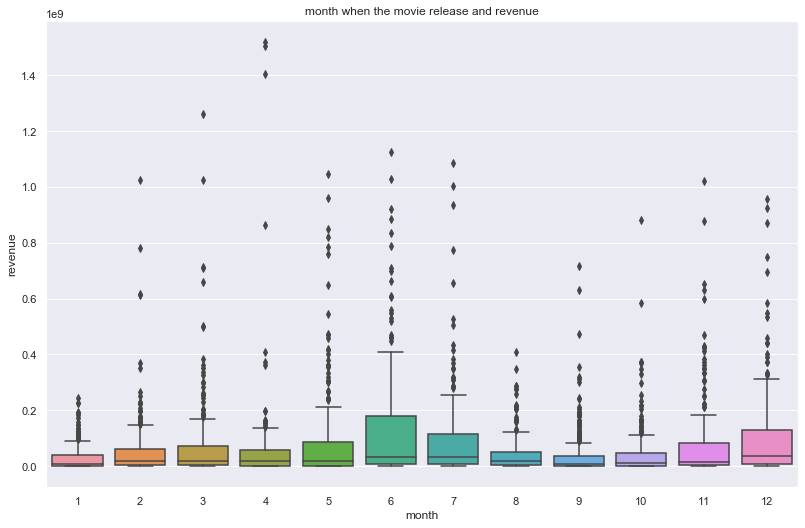

In [135]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='month', y='revenue', data=train_df)
plt.title('month when the movie release and revenue')

#### Season when the movie released and revenue

Text(0.5, 1.0, 'season when the movie release and revenue')

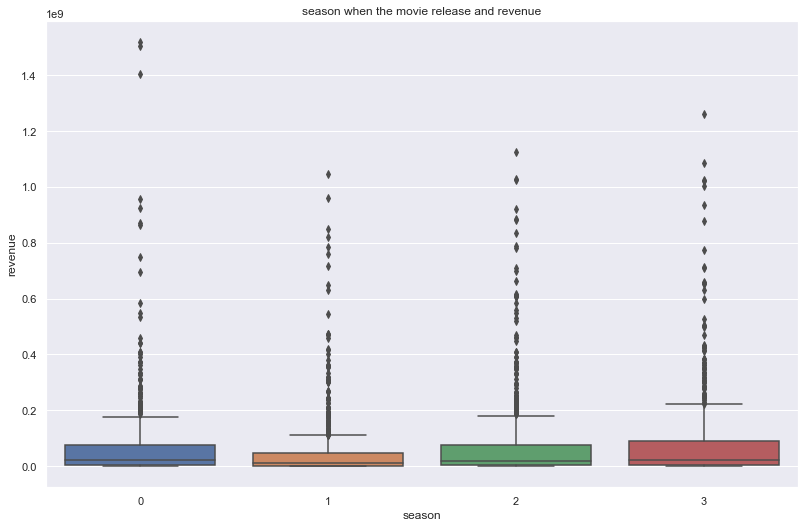

In [136]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='season', y='revenue', data=train_df)
plt.title('season when the movie release and revenue')

#### Year when the movie released and revenue

Text(0.5, 1.0, 'Year when the movie release and revenue')

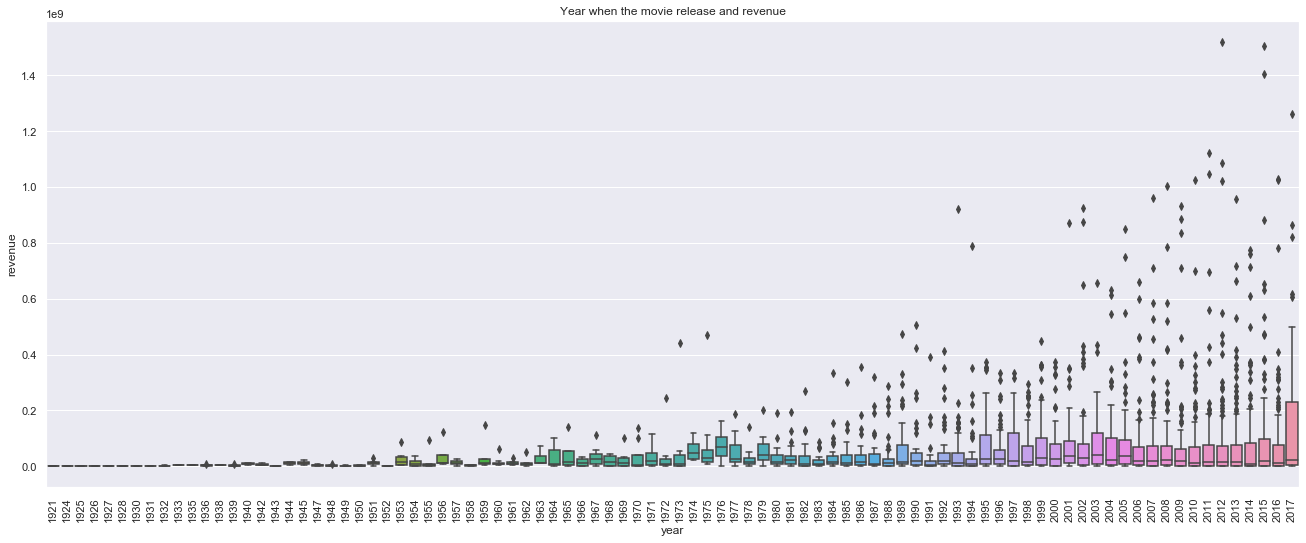

In [137]:
sns.set(rc={'figure.figsize':(20, 8)})
g = sns.boxplot(x='year', y='revenue', data=train_df)
plt.xticks(rotation=90)
plt.title('Year when the movie release and revenue')

#### Number of Production Companies and revenue

Text(0.5, 1.0, 'number of production companies for a movie and revenue')

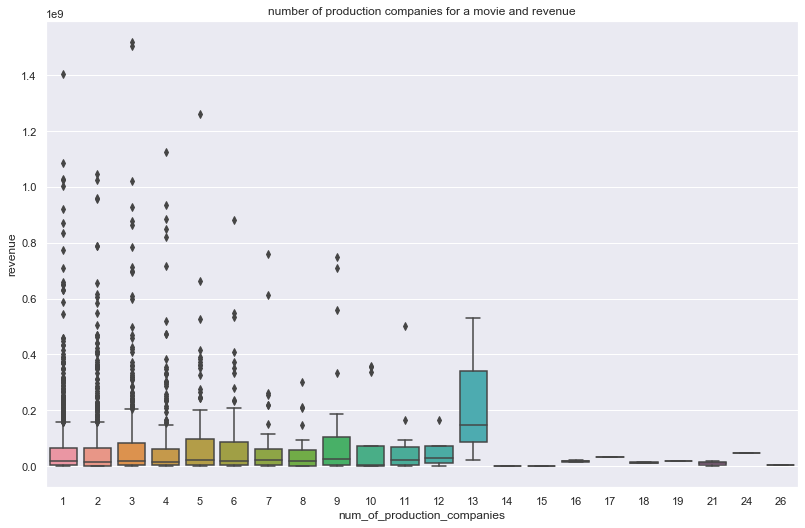

In [138]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='num_of_production_companies', y='revenue', data=train_df)
plt.title('number of production companies for a movie and revenue')

In [139]:
# f, ax = plt.subplots(len(production_companies_df.head(5).index.values), 1, figsize=(15,20))

# for i, p in enumerate(production_companies_df.head(5).index.values):
#     sns.boxplot(x=train_df['isProductionCompany_' + p], y='revenue', ax=ax[i], data=train_df)
#     ax[i].set_title('isProductionCompany_' + p +" and revenue boxplot")
# f.tight_layout()

In [140]:
# for i, p in enumerate(production_companies_df.index.values):
#     production_companies_df.loc[p, "median_salary"] = train_df[train_df['isProductionCompany_' + p]==1].revenue.median()

# production_companies_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(5)

In [141]:
# for i, p in enumerate(production_companies_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10).index.values):
#     train_df['isTopProductionCompany_' + p] = train_df['production_companies_processed'].apply(lambda x: 1 if p in x else 0)
#     #train_df['isTopProductionCompany_Other'] = train_df['production_companies_processed'].apply(lambda x: 1 if p not in x else 0)
#     test_df['isTopProductionCompany_' + p] = test_df['production_companies_processed'].apply(lambda x: 1 if p in x else 0)
#     #test_df['isTopProductionCompany_Other'] = test_df['production_companies_processed'].apply(lambda x: 1 if p not in x else 0)

## Machine Learning

#### Preparations before ML modeling

In [142]:
pd.set_option('display.max_columns', None)
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'log_revenue', 'title_len', 'log_title_len', 'overview_len',
       'log_overview_len', 'tagline_len', 'log_tagline_len', 'log_budget',
       'genres_processed', 'num_genres', 'is_english_language',
       'production_companies_processed', 'num_of_production_companies',
       'production_countries_processed', 'log_popularity', 'runtime_in_hours',
       'log_runtime', 'month', 'season', 'year', 'day_of_week', 'week_of_year',
       'num_of_cast', 'log_num_of_cast', 'num_of_male_cast',
       'log_num_of_male_cast', 'num_of_female_cast', 'log_num_of_female_cast',
       'num_of_crew', 'log_num_of_crew', 'num_of_male_crew',
       '

In [143]:
columns_for_training = ["log_budget", "log_popularity", "log_runtime", "day_of_week", "year", "month", "week_of_year",
                        "season", "num_genres", "num_of_production_countries", "log_num_of_cast", "log_num_of_male_cast",
                        "log_num_of_female_cast", "has_collection", "has_homepage", "has_tag", "is_english_language",
                        "log_num_of_crew", "log_num_of_male_crew", "log_num_of_female_crew", "log_title_len",
                        "log_overview_len", "log_tagline_len", "log_num_of_directors", "log_num_of_producers",
                        "log_num_of_editors", "log_num_of_art_crew", "log_num_of_sound_crew", "log_num_of_costume_crew",
                        "log_num_of_camera_crew", "log_num_of_visual_effects_crew", "log_num_of_lighting_crew",
                        "log_num_of_other_crew"]

In [144]:
# # adding isTopGenre_ columns for features before ML modeling
# columns_for_training.extend(train_df.select(lambda col: col.startswith('isTopGenre_'), axis=1).columns.values)

# # adding isTopProductionCompany_ columns for features before ML modeling
# columns_for_training.extend(train_df.select(lambda col: col.startswith('isTopProductionCompany_'), axis=1).columns.values)

# # adding isTopProductionCountry_ columns for features before ML modeling
# columns_for_training.extend(train_df.select(lambda col: col.startswith('isTopProductionCountry_'), axis=1).columns.values)

# # adding has_top_actor_ columns for features before ML modeling
# columns_for_training.extend(train_df.select(lambda col: col.startswith('has_top_actor_'), axis=1).columns.values)

# # adding has_top_keyword_ columns for features before ML modeling
# columns_for_training.extend(train_df.select(lambda col: col.startswith('has_top_keyword_'), axis=1).columns.values)

# # adding has_top_director_ columns for features before ML modeling
# columns_for_training.extend(train_df.select(lambda col: col.startswith('has_top_director_'), axis=1).columns.values)

# # adding has_top_producer_ columns for features before ML modeling
# columns_for_training.extend(train_df.select(lambda col: col.startswith('has_top_producer_'), axis=1).columns.values)

columns_for_training

['log_budget',
 'log_popularity',
 'log_runtime',
 'day_of_week',
 'year',
 'month',
 'week_of_year',
 'season',
 'num_genres',
 'num_of_production_countries',
 'log_num_of_cast',
 'log_num_of_male_cast',
 'log_num_of_female_cast',
 'has_collection',
 'has_homepage',
 'has_tag',
 'is_english_language',
 'log_num_of_crew',
 'log_num_of_male_crew',
 'log_num_of_female_crew',
 'log_title_len',
 'log_overview_len',
 'log_tagline_len',
 'log_num_of_directors',
 'log_num_of_producers',
 'log_num_of_editors',
 'log_num_of_art_crew',
 'log_num_of_sound_crew',
 'log_num_of_costume_crew',
 'log_num_of_camera_crew',
 'log_num_of_visual_effects_crew',
 'log_num_of_lighting_crew',
 'log_num_of_other_crew']

In [145]:
train_df[columns_for_training].head(4)

,log_budget,log_popularity,log_runtime,day_of_week,year,month,week_of_year,season,num_genres,num_of_production_countries,log_num_of_cast,log_num_of_male_cast,log_num_of_female_cast,has_collection,has_homepage,has_tag,is_english_language,log_num_of_crew,log_num_of_male_crew,log_num_of_female_crew,log_title_len,log_overview_len,log_tagline_len,log_num_of_directors,log_num_of_producers,log_num_of_editors,log_num_of_art_crew,log_num_of_sound_crew,log_num_of_costume_crew,log_num_of_camera_crew,log_num_of_visual_effects_crew,log_num_of_lighting_crew,log_num_of_other_crew
0,16.454568,2.024905,4.543295,5,2015,2,8,2,1,1,3.218876,2.397895,2.197225,1,0,1,1,4.290459,2.639057,0.000000,3.135494,5.049856,3.970292,1.609438,2.708050,1.098612,2.944439,2.772589,2.639057,2.197225,1.609438,1.609438,1.609438
1,17.504390,2.224504,4.736198,5,2004,8,32,0,4,1,3.044522,2.397895,2.397895,1,0,1,1,2.302585,1.609438,1.609438,3.713572,5.976351,4.110874,0.693147,1.609438,0.693147,0.000000,0.693147,0.000000,0.693147,0.000000,0.000000,0.000000
2,15.009433,4.178992,4.663439,5,2014,10,41,2,1,1,3.951244,2.639057,2.079442,0,1,1,1,4.174387,2.484907,1.609438,2.197225,4.875197,3.871201,1.386294,3.044522,1.945910,2.197225,2.708050,1.791759,1.609438,1.386294,0.693147,2.302585
3,13.997833,1.429099,4.812184,5,2012,3,10,3,2,1,2.079442,1.098612,0.693147,0,1,0,0,1.386294,0.000000,0.000000,2.079442,6.366470,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Checking for NA values in feature before training

In [146]:
train_df[columns_for_training].isna().sum().sum()

0

In [147]:
len(columns_for_training)

33

In [149]:
y = train_df['log_revenue']
X = train_df[columns_for_training]
kfold_splits = 5